In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2

def getArrays(tree):

    chi2 = np.zeros(tree.GetEntries())
    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2[j] = tree.chi2
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    return chi2, dm2, sin22th

def getContour(x,y,z,val):
    N=1000

    levels = [val]

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    cs = plt.contour(xi,yi,zi,levels, colors='firebrick')
    
    p = cs.collections[0].get_paths()[0]
    v = p.vertices
    return v

# Nue Appearance

In [3]:
mb_davio_99cl1=np.genfromtxt("limits/mb_davio_99_1.csv", delimiter=',')
mb_davio_99cl2=np.genfromtxt("limits/mb_davio_99_2.csv", delimiter=',')
mb_davio_99cl3=np.genfromtxt("limits/mb_davio_99_3.csv", delimiter=',')
mb_davio_99cl4=np.genfromtxt("limits/mb_davio_99_4.csv", delimiter=',')
mb_davio_90cl1=np.genfromtxt("limits/mb_davio_90.csv", delimiter=',')

lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv", delimiter=',')
lsnd_davio_99cl2=np.genfromtxt("limits/lsnd_davio_99_2.csv", delimiter=',')
lsnd_davio_90cl1=np.genfromtxt("limits/lsnd_davio_90_1.csv", delimiter=',')
lsnd_davio_90cl2=np.genfromtxt("limits/lsnd_davio_90_2.csv", delimiter=',')
lsnd_davio_90cl3=np.genfromtxt("limits/lsnd_davio_90_3.csv", delimiter=',')
lsnd_davio_90cl4=np.genfromtxt("limits/lsnd_davio_90_4.csv", delimiter=',')
lsnd_davio_90cl5=np.genfromtxt("limits/lsnd_davio_90_5.csv", delimiter=',')

ic_davio_90=np.genfromtxt('limits/ic_outline_90.csv',delimiter=',')

Text(0.5, 1.0, '$\\nu_e$ Appearance Datasets')

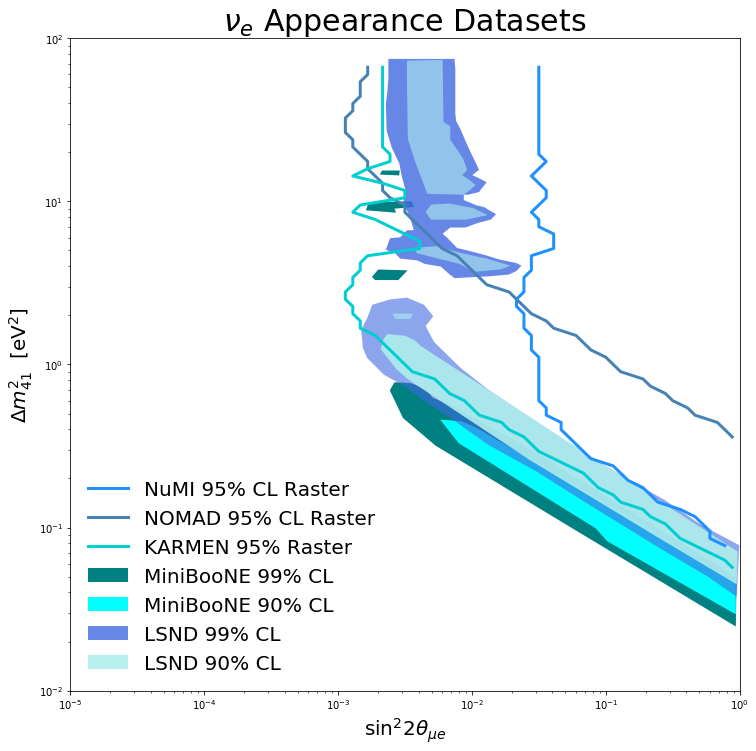

In [4]:
fig, ax = plt.subplots(figsize=(12,12))

# MB
plt.fill(mb_davio_99cl1[:,0],mb_davio_99cl1[:,1], facecolor='teal',zorder=-2,label='MiniBooNE 99% CL')
plt.fill(mb_davio_99cl2[:,0],mb_davio_99cl2[:,1], facecolor='teal',zorder=-2)
plt.fill(mb_davio_99cl3[:,0],mb_davio_99cl3[:,1], facecolor='teal',zorder=-2)
plt.fill(mb_davio_99cl4[:,0],mb_davio_99cl4[:,1], facecolor='teal',zorder=-2)
plt.fill(mb_davio_90cl1[:,0],mb_davio_90cl1[:,1], facecolor='aqua',zorder=-1,label='MiniBooNE 90% CL')

f = ROOT.TFile("../Oct2020/validation/numi_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label='NuMI 95% CL Raster')

f = ROOT.TFile("../Oct2020/validation/nomad_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='steelblue',linewidth=3,label='NOMAD 95% CL Raster')

f = ROOT.TFile("../Oct2020/validation/karmen_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='darkturquoise',linewidth=3,label='KARMEN 95% Raster')

plt.fill(lsnd_davio_99cl1[:,0],lsnd_davio_99cl1[:,1], facecolor='royalblue',zorder=-1,label='LSND 99% CL',alpha=.8)
plt.fill(lsnd_davio_99cl2[:,0],lsnd_davio_99cl2[:,1], facecolor='royalblue',zorder=-1,alpha=.6)
plt.fill(lsnd_davio_90cl1[:,0],lsnd_davio_90cl1[:,1], facecolor='paleturquoise',zorder=-1,alpha=.6)
plt.fill(lsnd_davio_90cl2[:,0],lsnd_davio_90cl2[:,1], facecolor='paleturquoise',zorder=-1,alpha=.6)
plt.fill(lsnd_davio_90cl3[:,0],lsnd_davio_90cl3[:,1], facecolor='paleturquoise',zorder=-1,alpha=.6)
plt.fill(lsnd_davio_90cl4[:,0],lsnd_davio_90cl4[:,1], facecolor='paleturquoise',zorder=-1,alpha=.6)
plt.fill(lsnd_davio_90cl5[:,0],lsnd_davio_90cl5[:,1], facecolor='paleturquoise',zorder=-1,label='LSND 90% CL',alpha=.9)

ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_e$ Appearance Datasets',fontsize=30)

Text(0.5, 1.0, '$\\nu_e$ Appearance Datasets')

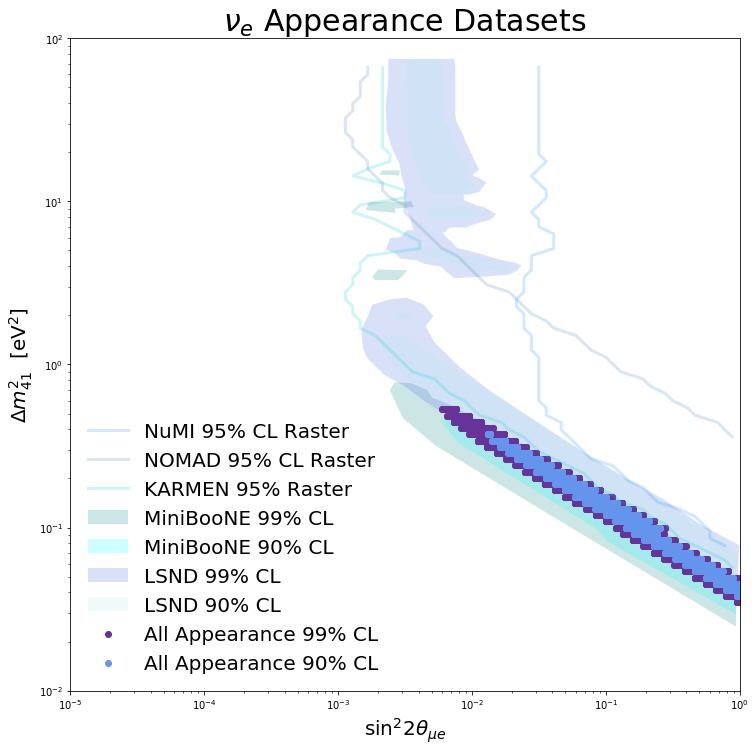

In [5]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = .2

# MB
plt.fill(mb_davio_99cl1[:,0],mb_davio_99cl1[:,1], facecolor='teal',zorder=-2,label='MiniBooNE 99% CL',alpha=bkalpha)
plt.fill(mb_davio_99cl2[:,0],mb_davio_99cl2[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_99cl3[:,0],mb_davio_99cl3[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_99cl4[:,0],mb_davio_99cl4[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_90cl1[:,0],mb_davio_90cl1[:,1], facecolor='aqua',zorder=-1,label='MiniBooNE 90% CL',alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/numi_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label='NuMI 95% CL Raster',alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/nomad_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='steelblue',linewidth=3,label='NOMAD 95% CL Raster',alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/karmen_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='darkturquoise',linewidth=3,label='KARMEN 95% Raster',alpha=bkalpha)

plt.fill(lsnd_davio_99cl1[:,0],lsnd_davio_99cl1[:,1], facecolor='royalblue',zorder=-1,label='LSND 99% CL',alpha=bkalpha)
plt.fill(lsnd_davio_99cl2[:,0],lsnd_davio_99cl2[:,1], facecolor='royalblue',zorder=-1,alpha=bkalpha)
plt.fill(lsnd_davio_90cl1[:,0],lsnd_davio_90cl1[:,1], facecolor='paleturquoise',zorder=-1,alpha=bkalpha)
plt.fill(lsnd_davio_90cl2[:,0],lsnd_davio_90cl2[:,1], facecolor='paleturquoise',zorder=-1,alpha=bkalpha)
plt.fill(lsnd_davio_90cl3[:,0],lsnd_davio_90cl3[:,1], facecolor='paleturquoise',zorder=-1,alpha=bkalpha)
plt.fill(lsnd_davio_90cl4[:,0],lsnd_davio_90cl4[:,1], facecolor='paleturquoise',zorder=-1,alpha=bkalpha)
plt.fill(lsnd_davio_90cl5[:,0],lsnd_davio_90cl5[:,1], facecolor='paleturquoise',zorder=-1,label='LSND 90% CL',alpha=bkalpha)

f = ROOT.TFile("../Oct2020/allapp_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,c='rebeccapurple',label='All Appearance 99% CL')
plt.scatter(sin22th_90,dm2_90,c='cornflowerblue',label='All Appearance 90% CL')

ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_e$ Appearance Datasets',fontsize=30)

# Nue Disappearance

Text(0.5, 1.0, '$\\nu_e$ Disappearance Datasets')

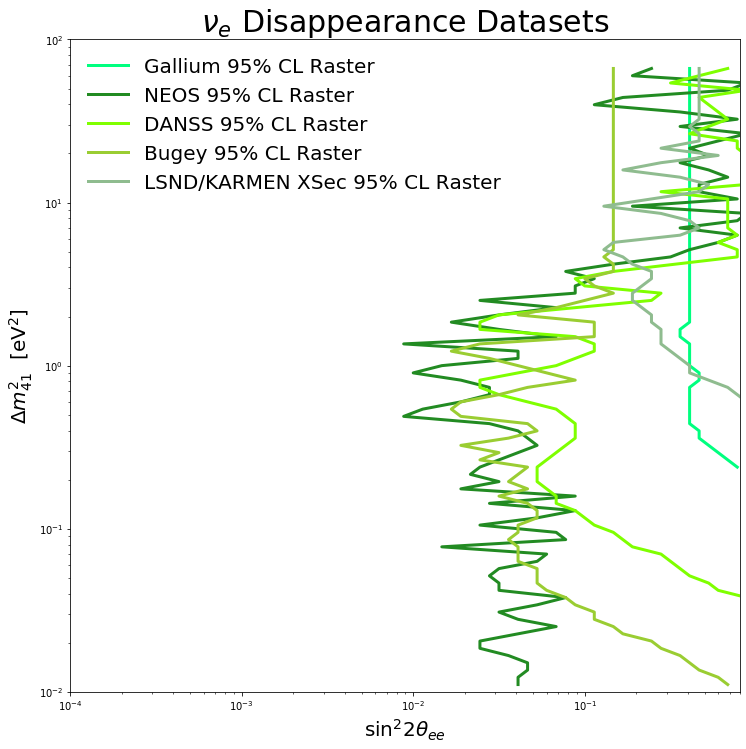

In [12]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = 1.0

f = ROOT.TFile("../Oct2020/validation/gallium_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='Gallium 95% CL Raster',c='springgreen',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/neos_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='NEOS 95% CL Raster',c='forestgreen',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/danss_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='DANSS 95% CL Raster',alpha=bkalpha,c='chartreuse',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/bugey_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, label='Bugey 95% CL Raster',alpha=bkalpha,c='yellowgreen',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/xsec_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='LSND/KARMEN XSec 95% CL Raster',alpha=bkalpha,c='darkseagreen',linewidth=3)

ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_e$ Disappearance Datasets',fontsize=30)

Text(0.5, 1.0, '$\\nu_e$ Disappearance Datasets')

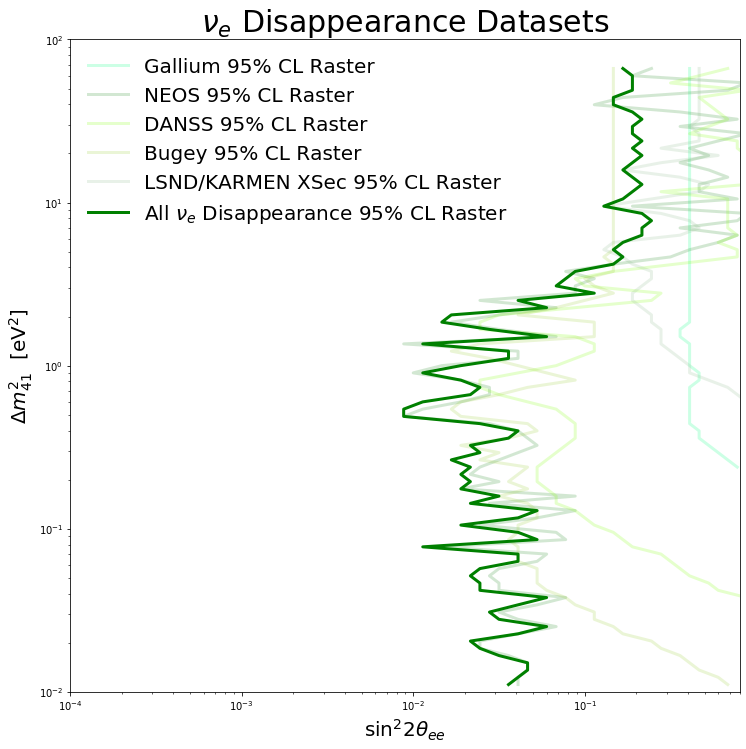

In [13]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = .2

f = ROOT.TFile("../Oct2020/validation/gallium_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='Gallium 95% CL Raster',c='springgreen',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/neos_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='NEOS 95% CL Raster',c='forestgreen',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/danss_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='DANSS 95% CL Raster',alpha=bkalpha,c='chartreuse',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/bugey_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95, label='Bugey 95% CL Raster',alpha=bkalpha,c='yellowgreen',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/xsec_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='LSND/KARMEN XSec 95% CL Raster',alpha=bkalpha,c='darkseagreen',linewidth=3)

f = ROOT.TFile("../Oct2020/NueDis_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'All $\nu_e$ Disappearance 95% CL Raster',c='green',linewidth=3)

ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_e$ Disappearance Datasets',fontsize=30)

# Numu Disappearance

Text(0.5, 1.0, '$\\nu_\\mu$ Disappearance Datasets')

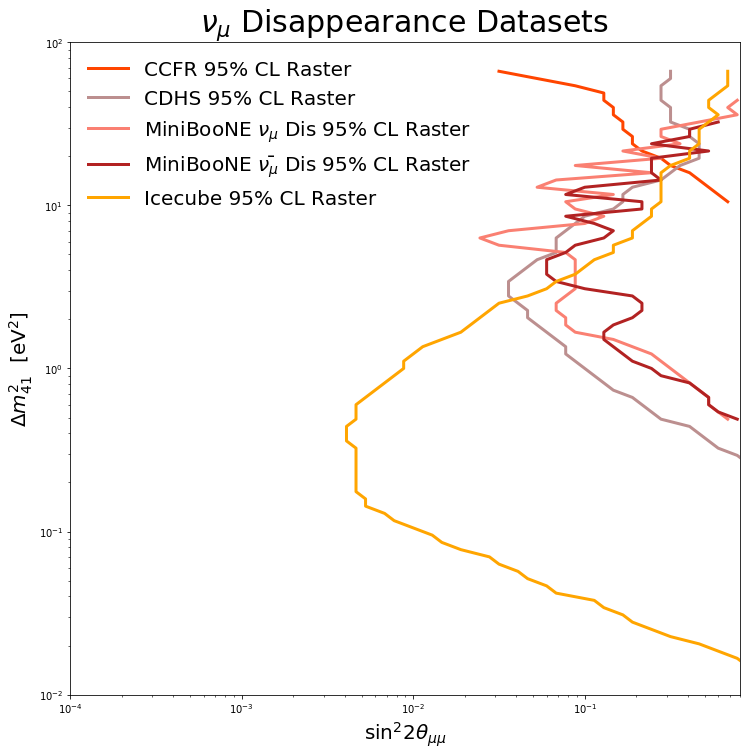

In [14]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = 1.0

f = ROOT.TFile("../Oct2020/validation/ccfr_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CCFR 95% CL Raster',c='orangered',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/cdhs_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CDHS 95% CL Raster',c='rosybrown',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/mbnudis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\nu_\mu$ Dis 95% CL Raster',alpha=bkalpha,c='salmon',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/mbnubardis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\bar{\nu_\mu}$ Dis 95% CL Raster',alpha=bkalpha,c='firebrick',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/ic_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'Icecube 95% CL Raster',alpha=bkalpha,c='orange',linewidth=3)


ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_\mu$ Disappearance Datasets',fontsize=30)

Text(0.5, 1.0, '$\\nu_\\mu$ Disappearance Datasets')

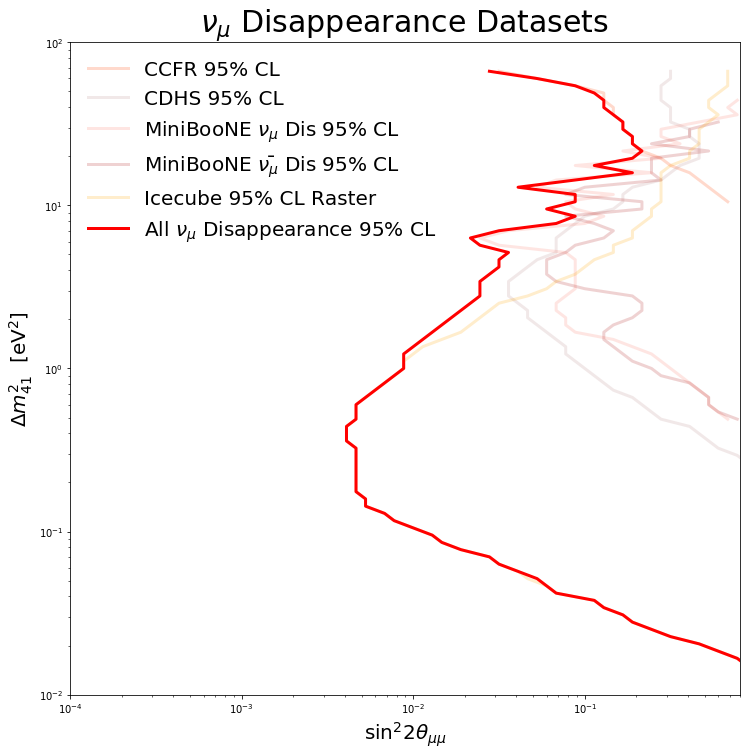

In [17]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = .2

f = ROOT.TFile("../Oct2020/validation/ccfr_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CCFR 95% CL',c='orangered',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/cdhs_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CDHS 95% CL',c='rosybrown',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/mbnudis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\nu_\mu$ Dis 95% CL',alpha=bkalpha,c='salmon',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/mbnubardis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\bar{\nu_\mu}$ Dis 95% CL',alpha=bkalpha,c='firebrick',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/ic_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'Icecube 95% CL Raster',alpha=bkalpha,c='orange',linewidth=3)

f = ROOT.TFile("../Oct2020/NumuDis_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'All $\nu_\mu$ Disappearance 95% CL',color='red',linewidth=3)

ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_\mu$ Disappearance Datasets',fontsize=30)

# How to reads Sensitivity Plots

In [4]:
fakebean99 = np.genfromtxt('fake_globalbean_99CL.csv',delimiter=',')
fakebean90 = np.genfromtxt('fake_globalbean_90CL.csv',delimiter=',')
fakecontour95 = np.genfromtxt('fake_globalcontour_95CL.csv',delimiter=',')

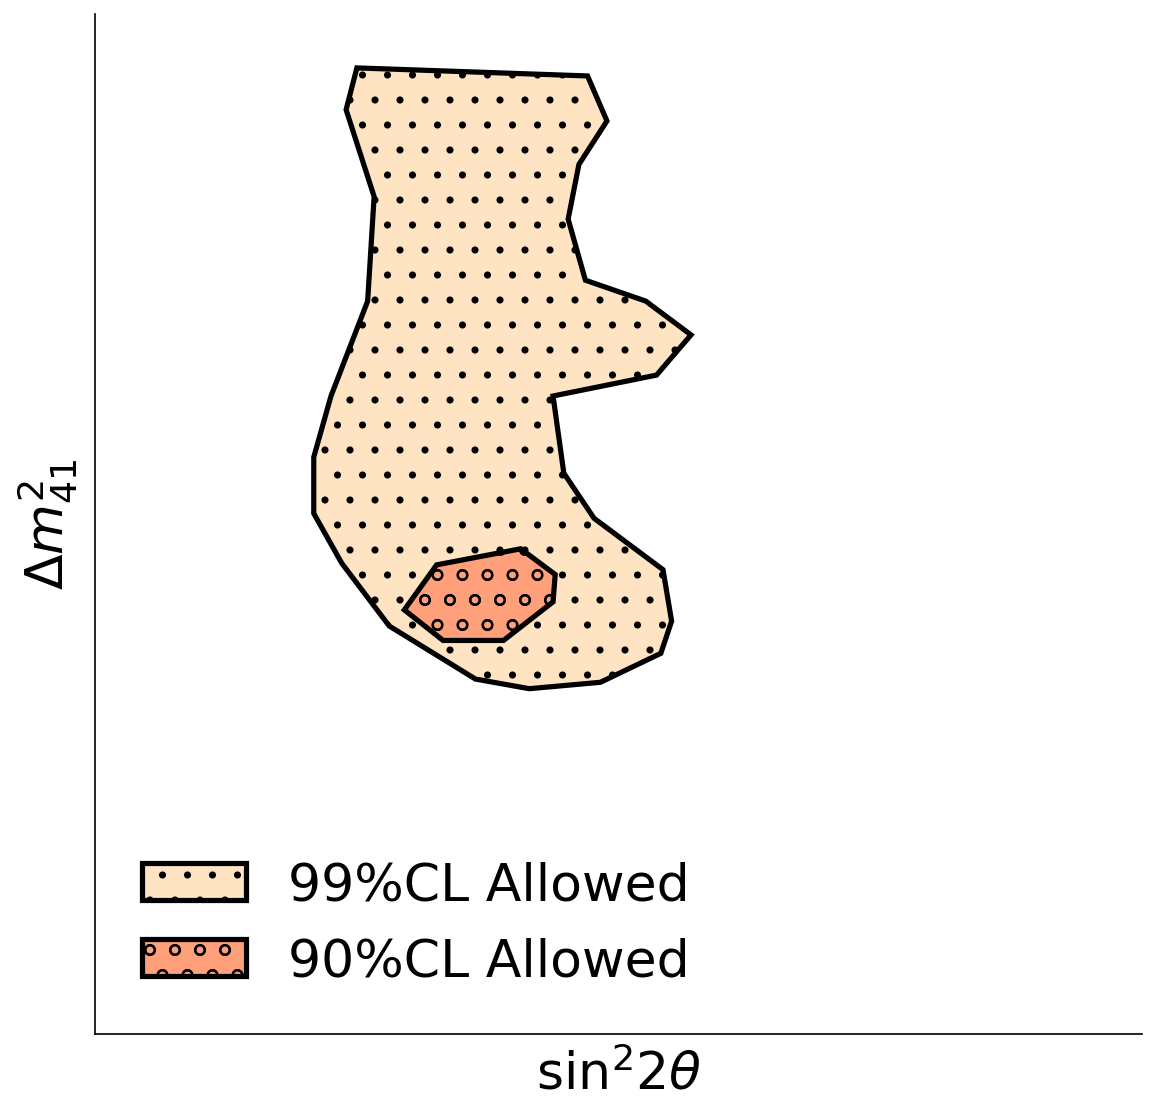

In [5]:
fig= plt.figure( dpi=150,frameon=False,facecolor='none',figsize=(9,9))
ax = fig.add_subplot(111)

c = 'black'

ax.set_xlabel(r'$\sin^2 2 \theta$',fontsize=25)
ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(c)
ax.spines['left'].set_color(c)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.xlim(1e-5,.1)
plt.ylim(0.1,100)

ax.tick_params(axis='both', which='both', length=0)

plt.fill(fakebean99[:,0],fakebean99[:,1],edgecolor='black',facecolor='bisque',hatch='.',linewidth=2.5,linestyle='-',label='99%CL Allowed')
plt.fill(fakebean90[:,0],fakebean90[:,1],edgecolor='black',facecolor='lightsalmon',hatch='o',linewidth=2.5,linestyle='-',label='90%CL Allowed')

plt.legend(frameon=False,fontsize=25)
fig.savefig('numu.png', transparent=True)

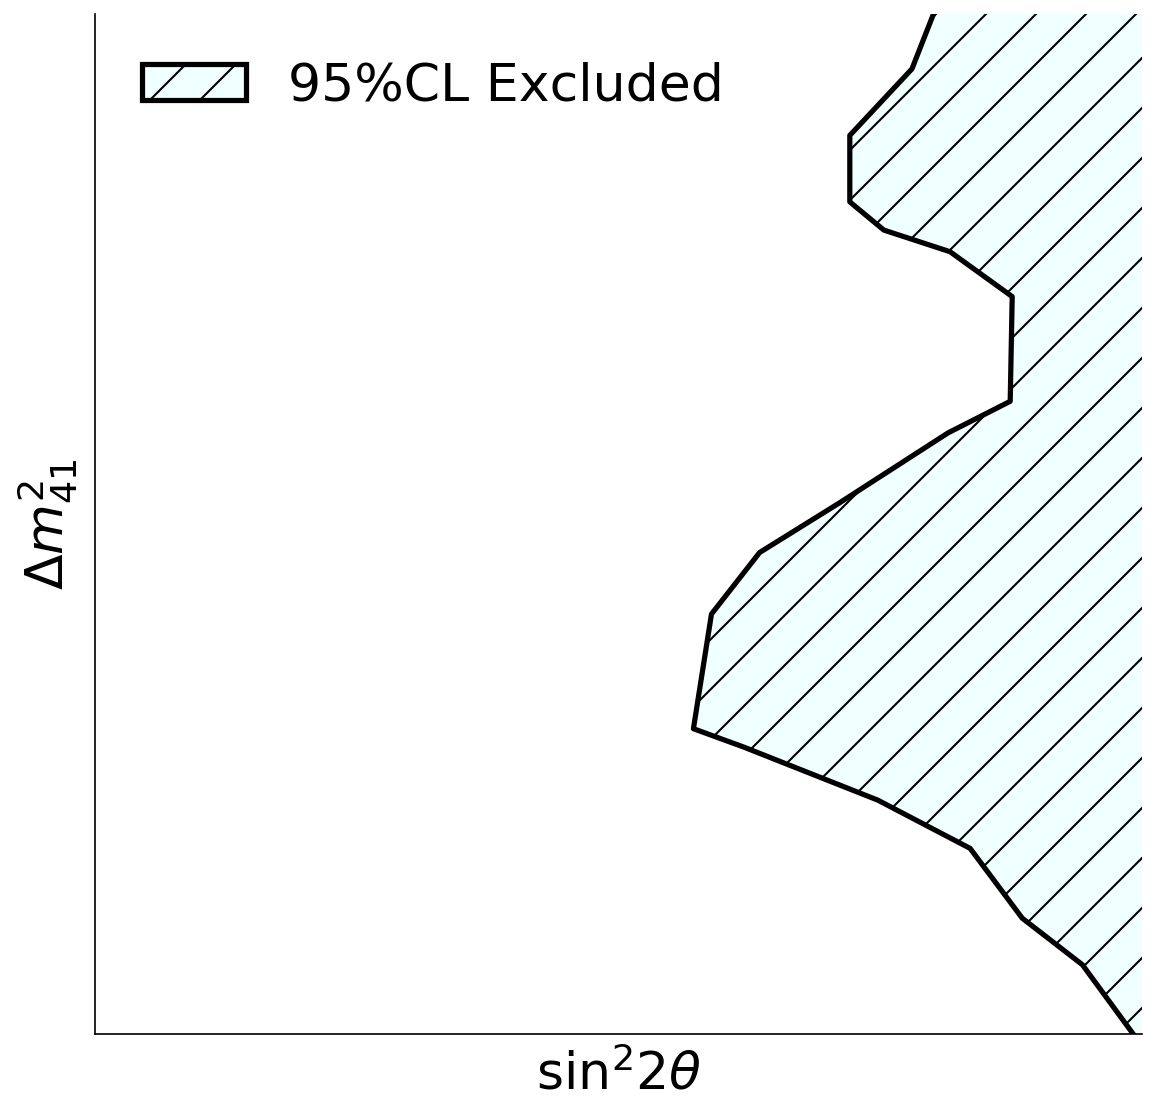

In [6]:
fig= plt.figure( dpi=150,frameon=False,facecolor='none',figsize=(9,9))
ax = fig.add_subplot(111)

c = 'black'

ax.set_xlabel(r'$\sin^2 2 \theta$',fontsize=25)
ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)

plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(c)
ax.spines['left'].set_color(c)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.xlim(1e-5,.2)
plt.ylim(0.1,80)

ax.tick_params(axis='both', which='both', length=0)

ax.fill_betweenx(fakecontour95[:,1],fakecontour95[:,0],np.ones(len(fakecontour95)),edgecolor='black',facecolor='azure',hatch='/',linewidth=2.5,linestyle='-',label='95%CL Excluded')

plt.legend(frameon=False,fontsize=25,loc='upper left')
fig.savefig('numu.png', transparent=True)

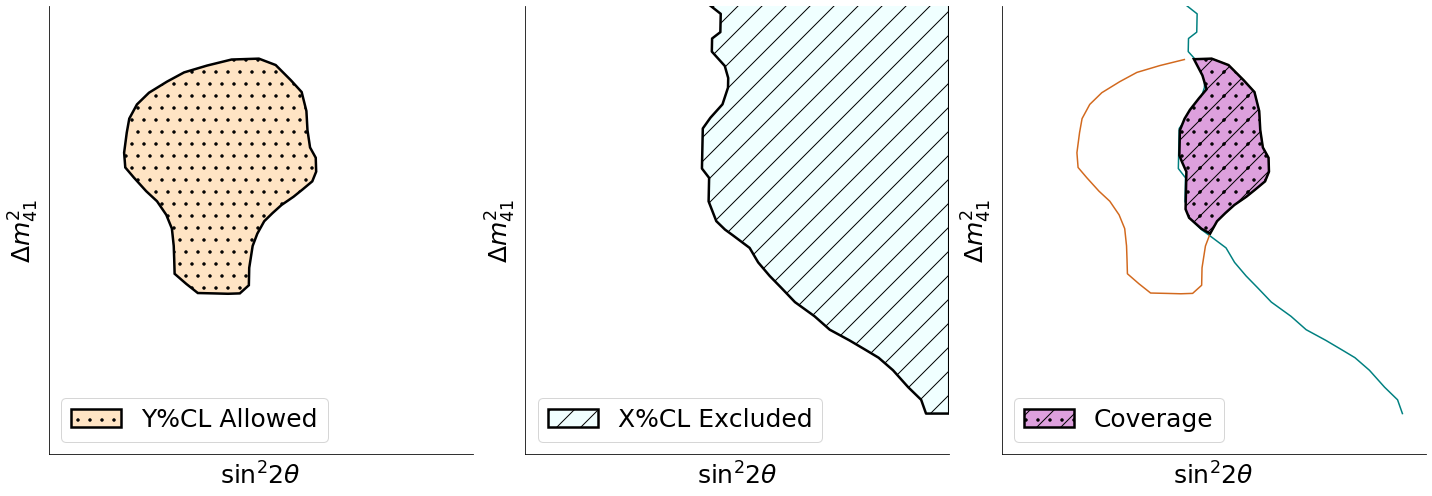

In [34]:
fakebean = np.genfromtxt('coverage_fakeblob.csv',delimiter=',')
fakecontour = np.genfromtxt('coverage_fakecontour.csv',delimiter=',')
fakeoverlap =  np.genfromtxt('coverage_fakeoverlap.csv',delimiter=',')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
axes = axes.flatten()

titlesize = 30
labelsize = 20

for ax in axes:
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.axes(ax)
    ax.set_xlabel(r'$\sin^2 2 \theta$',fontsize=25)
    ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)
    ax.tick_params(axis='both', which='both', length=0)
    
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(c)
    ax.spines['left'].set_color(c)
    plt.xlim(.01,1)
    plt.ylim(0.01,100)
    
axes[0].fill(fakebean[:,0],fakebean[:,1],edgecolor='black',facecolor='bisque',hatch='.',linewidth=2.5,linestyle='-',label='Y% CL Allowed')
axes[0].legend(fontsize=25,loc='lower left')

axes[1].fill_betweenx(fakecontour[:,1],fakecontour[:,0],np.ones(len(fakecontour)),edgecolor='black',facecolor='azure',hatch='/',linewidth=2.5,linestyle='-',label='X% CL Excluded')
axes[1].legend(fontsize=25,loc='lower left')


axes[2].plot(fakecontour[:,0],fakecontour[:,1],color='teal')
axes[2].plot(fakebean[:,0],fakebean[:,1],color='chocolate')
axes[2].fill(fakeoverlap[:,0],fakeoverlap[:,1],edgecolor='black',facecolor='plum',hatch='/.',linewidth=2.5,linestyle='-',label='Coverage',zorder=10)
axes[2].legend(fontsize=25,loc='lower left')


fig.tight_layout()

# Comparison Plots

In [43]:
# Load up references
gallium=np.genfromtxt("limits/gallium_95.csv", delimiter=',')
karmen=np.genfromtxt("limits/karmen_95.csv", delimiter=',')
nomad=np.genfromtxt("limits/nomad_95.csv", delimiter=',')
numi=np.genfromtxt("limits/numi_95.csv", delimiter=',')

xsec=np.genfromtxt("limits/xsec_95.csv", delimiter=',')
bugey=np.genfromtxt("limits/bugey_90.csv",delimiter=',')

danss=np.genfromtxt("limits/danss_95.csv", delimiter=',')
cdhs=np.genfromtxt("limits/cdhs_95.csv", delimiter=',')
ccfr=np.genfromtxt("limits/ccfr_95.csv", delimiter=',')
lsnd1=np.genfromtxt("limits/LSND_1.csv", delimiter=',')
lsnd2=np.genfromtxt("limits/LSND_2.csv", delimiter=',')
lsnd3=np.genfromtxt("limits/LSND_3.csv", delimiter=',')
neos=np.genfromtxt("limits/neos_90.csv", delimiter=',')
mb_combined_99cl=np.genfromtxt("limits/mb_combined_99.csv", delimiter=',')
mb_combined_90cl=np.genfromtxt("limits/mb_combined_90.csv", delimiter=',')
ic = np.genfromtxt('/home/dcianci/Physics/GlobalFits/IcecubePack/notebooks/ic90.txt')



mb_combined_2018_99cl1=np.genfromtxt("limits/mb_ref2018_99_1.csv", delimiter=',')
mb_combined_2018_99cl2=np.genfromtxt("limits/mb_ref2018_99_2.csv", delimiter=',')
mb_combined_2018_99cl3=np.genfromtxt("limits/mb_ref2018_99_3.csv", delimiter=',')
mb_combined_2018_99cl4=np.genfromtxt("limits/mb_ref2018_99_4.csv", delimiter=',')

mb_combined_2018_90cl=np.genfromtxt("limits/mb_ref2018_90.csv", delimiter=',')

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
mbnubardis_90cl=np.genfromtxt("limits/mbnubardis_90.csv",delimiter=',')


#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')
#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')

In [44]:
c_app_90 = 'aquamarine'
c_app_95 = 'lightseagreen'
c_app_99 = 'teal'

c_ref_90 = 'lightcoral'
c_ref_95 = 'firebrick'
c_ref_99 = 'darkred'

c_nuedis_95 = 'lightseagreen'




c_ref_95 = 'firebrick'
c_ref_90 = 'lightcoral'
c_ref_99 = 'firebrick'
c_ref_outline = 'darkred'




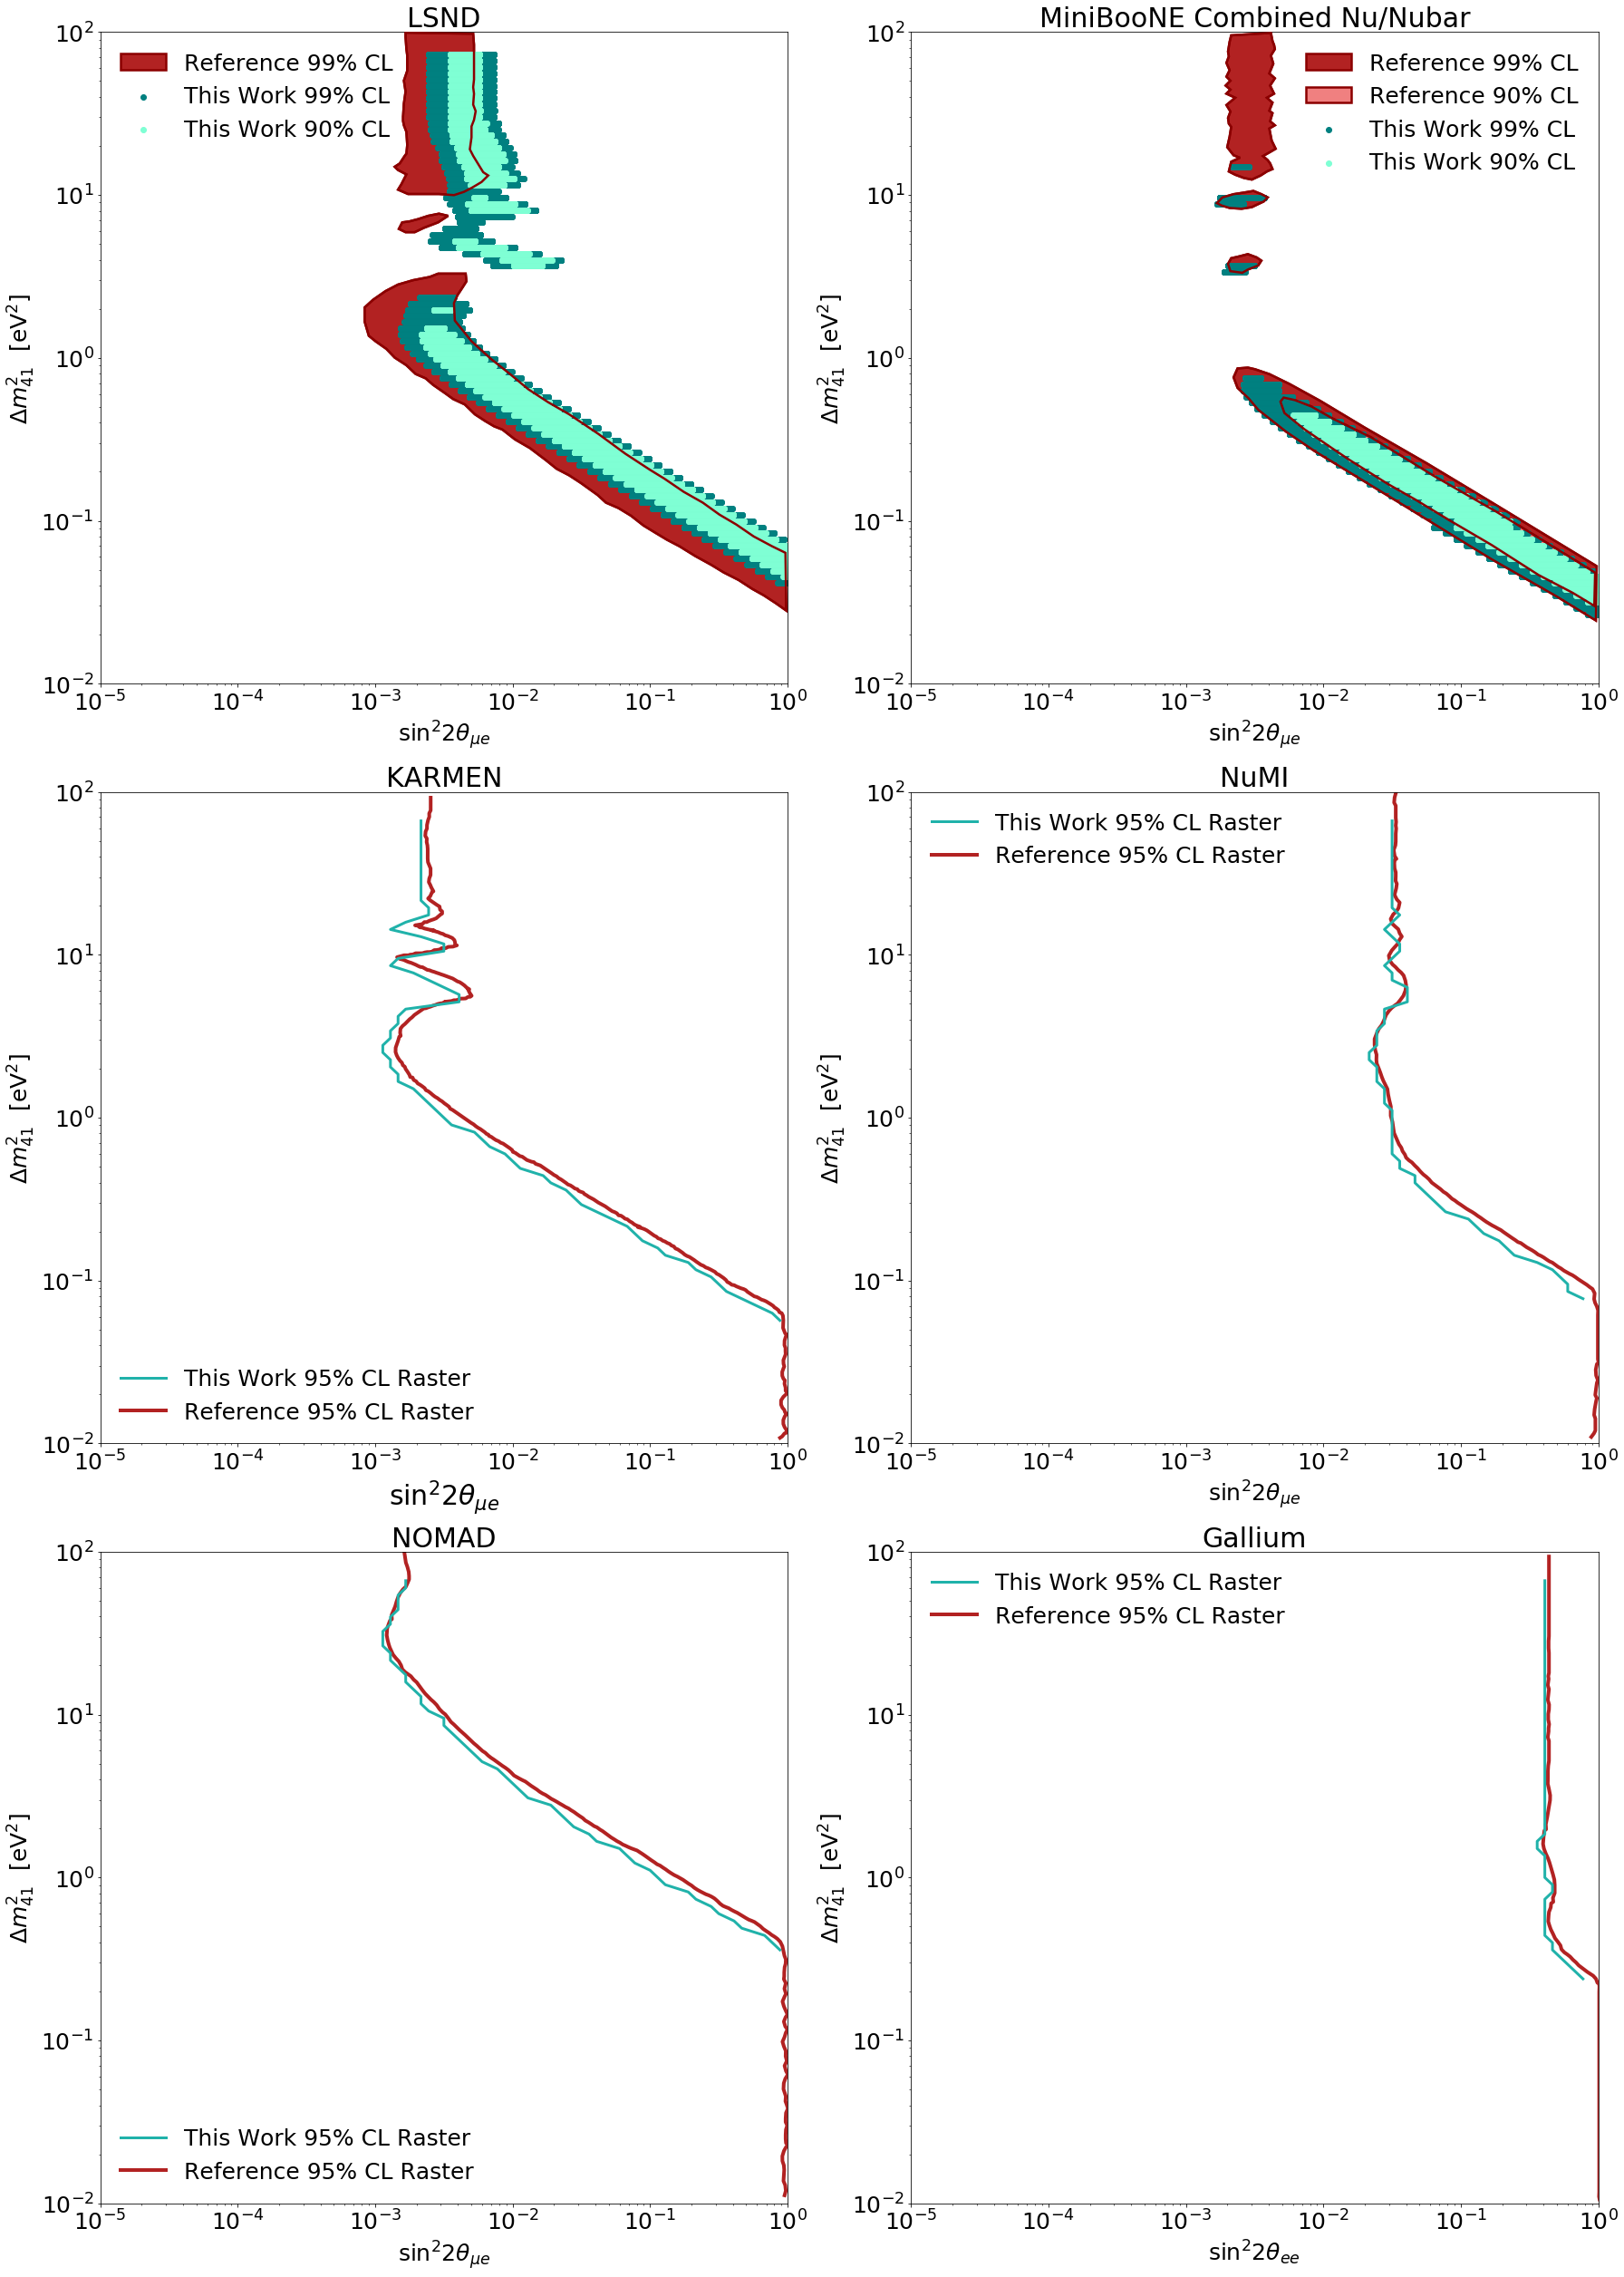

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,35))
axes = axes.flatten()

titlesize = 30
labelsize = 25

for ax in axes:
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.axes(ax)
    plt.xlim(1e-5,1)
    plt.ylim(0.01,100)
    ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=labelsize)
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)

# LSND
f = ROOT.TFile("../Oct2020/validation/lsnd_val_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.axes(axes[0])
axes[0].set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=labelsize)
plt.fill(lsnd1[:,0],lsnd1[:,1], edgecolor=c_ref_outline, facecolor=c_ref_99, linewidth=2.5, linestyle="-",label='Reference 99% CL',zorder=-2)
plt.fill(lsnd2[:,0],lsnd2[:,1], edgecolor=c_ref_outline, facecolor=c_ref_99, linewidth=2.5,  linestyle="-",zorder=-2)
plt.fill(lsnd3[:,0],lsnd3[:,1], edgecolor=c_ref_outline, facecolor=c_ref_99, linewidth=2.5,  linestyle="-",zorder=-2)

plt.fill(lsnd1[:,0],lsnd1[:,1], edgecolor=c_ref_outline, facecolor="none", linewidth=2.5, linestyle="-",zorder=10)
plt.fill(lsnd2[:,0],lsnd2[:,1], edgecolor=c_ref_outline, facecolor="none", linewidth=2.5,  linestyle="-",zorder=10)
plt.fill(lsnd3[:,0],lsnd3[:,1], edgecolor=c_ref_outline, facecolor="none", linewidth=2.5,  linestyle="-",zorder=10)


plt.scatter(sin22th_99,dm2_99,c=c_app_99,label='This Work 99% CL')
plt.scatter(sin22th_90,dm2_90,c=c_app_90,label='This Work 90% CL')
plt.title("LSND",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

# MB
f = ROOT.TFile("../Oct2020/validation/mb_val_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.axes(axes[1])
axes[1].set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_app_99,label='This Work 99% CL')
plt.scatter(sin22th_90,dm2_90,c=c_app_90,label='This Work 90% CL')
plt.fill(mb_combined_2018_99cl1[:,0],mb_combined_2018_99cl1[:,1], edgecolor=c_ref_outline, facecolor=c_ref_99, linewidth=2.5, linestyle="-",label='Reference 99% CL',zorder=-2)
plt.fill(mb_combined_2018_99cl2[:,0],mb_combined_2018_99cl2[:,1], edgecolor=c_ref_outline, facecolor=c_ref_99, linewidth=2.5,  linestyle="-",zorder=-2)
plt.fill(mb_combined_2018_99cl3[:,0],mb_combined_2018_99cl3[:,1], edgecolor=c_ref_outline, facecolor=c_ref_99, linewidth=2.5,  linestyle="-",zorder=-2)
plt.fill(mb_combined_2018_99cl4[:,0],mb_combined_2018_99cl4[:,1], edgecolor=c_ref_outline, facecolor=c_ref_99, linewidth=2.5,  linestyle="-",zorder=-2)
plt.fill(mb_combined_2018_90cl[:,0],mb_combined_2018_90cl[:,1], edgecolor=c_ref_outline, facecolor=c_ref_90, linewidth=2.5,  linestyle="-",label='Reference 90% CL',zorder=-1)

plt.fill(mb_combined_2018_99cl1[:,0],mb_combined_2018_99cl1[:,1], edgecolor=c_ref_outline, facecolor='none', linewidth=2.5, linestyle="-",zorder=10)
plt.fill(mb_combined_2018_99cl2[:,0],mb_combined_2018_99cl2[:,1], edgecolor=c_ref_outline, facecolor='none', linewidth=2.5,  linestyle="-",zorder=10)
plt.fill(mb_combined_2018_99cl3[:,0],mb_combined_2018_99cl3[:,1], edgecolor=c_ref_outline, facecolor='none', linewidth=2.5,  linestyle="-",zorder=10)
plt.fill(mb_combined_2018_99cl4[:,0],mb_combined_2018_99cl4[:,1], edgecolor=c_ref_outline, facecolor='none', linewidth=2.5,  linestyle="-",zorder=10)
plt.fill(mb_combined_2018_90cl[:,0],mb_combined_2018_90cl[:,1], edgecolor=c_ref_outline, facecolor='none', linewidth=2.5,  linestyle="-",zorder=10)



plt.title("MiniBooNE Combined Nu/Nubar",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

#KARMEN
f = ROOT.TFile("../Oct2020/validation/karmen_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.axes(axes[2])
axes[2].set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=titlesize)
plt.plot(sin22th_95,dm2_95, c=c_app_95,label='This Work 95% CL Raster',linewidth=3)
refx = karmen[:,0]
refy = karmen[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("KARMEN",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

# NuMI
f = ROOT.TFile("../Oct2020/validation/numi_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.axes(axes[3])
axes[3].set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_app_95,label='This Work 95% CL Raster',linewidth=3)
refx = numi[:,0]
refy = numi[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("NuMI",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

# NOMAD
f = ROOT.TFile("../Oct2020/validation/nomad_val_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[4])
axes[4].set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_app_95,label='This Work 95% CL Raster',linewidth=3)
refx = nomad[:,0]
refy = nomad[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("NOMAD",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

#GALLIUM
f = ROOT.TFile("../Oct2020/validation/gallium_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[5])
axes[5].set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='This Work 95% CL Raster',linewidth=3)
refx = gallium[:,0]
refy = gallium[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("Gallium",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

fig.tight_layout()

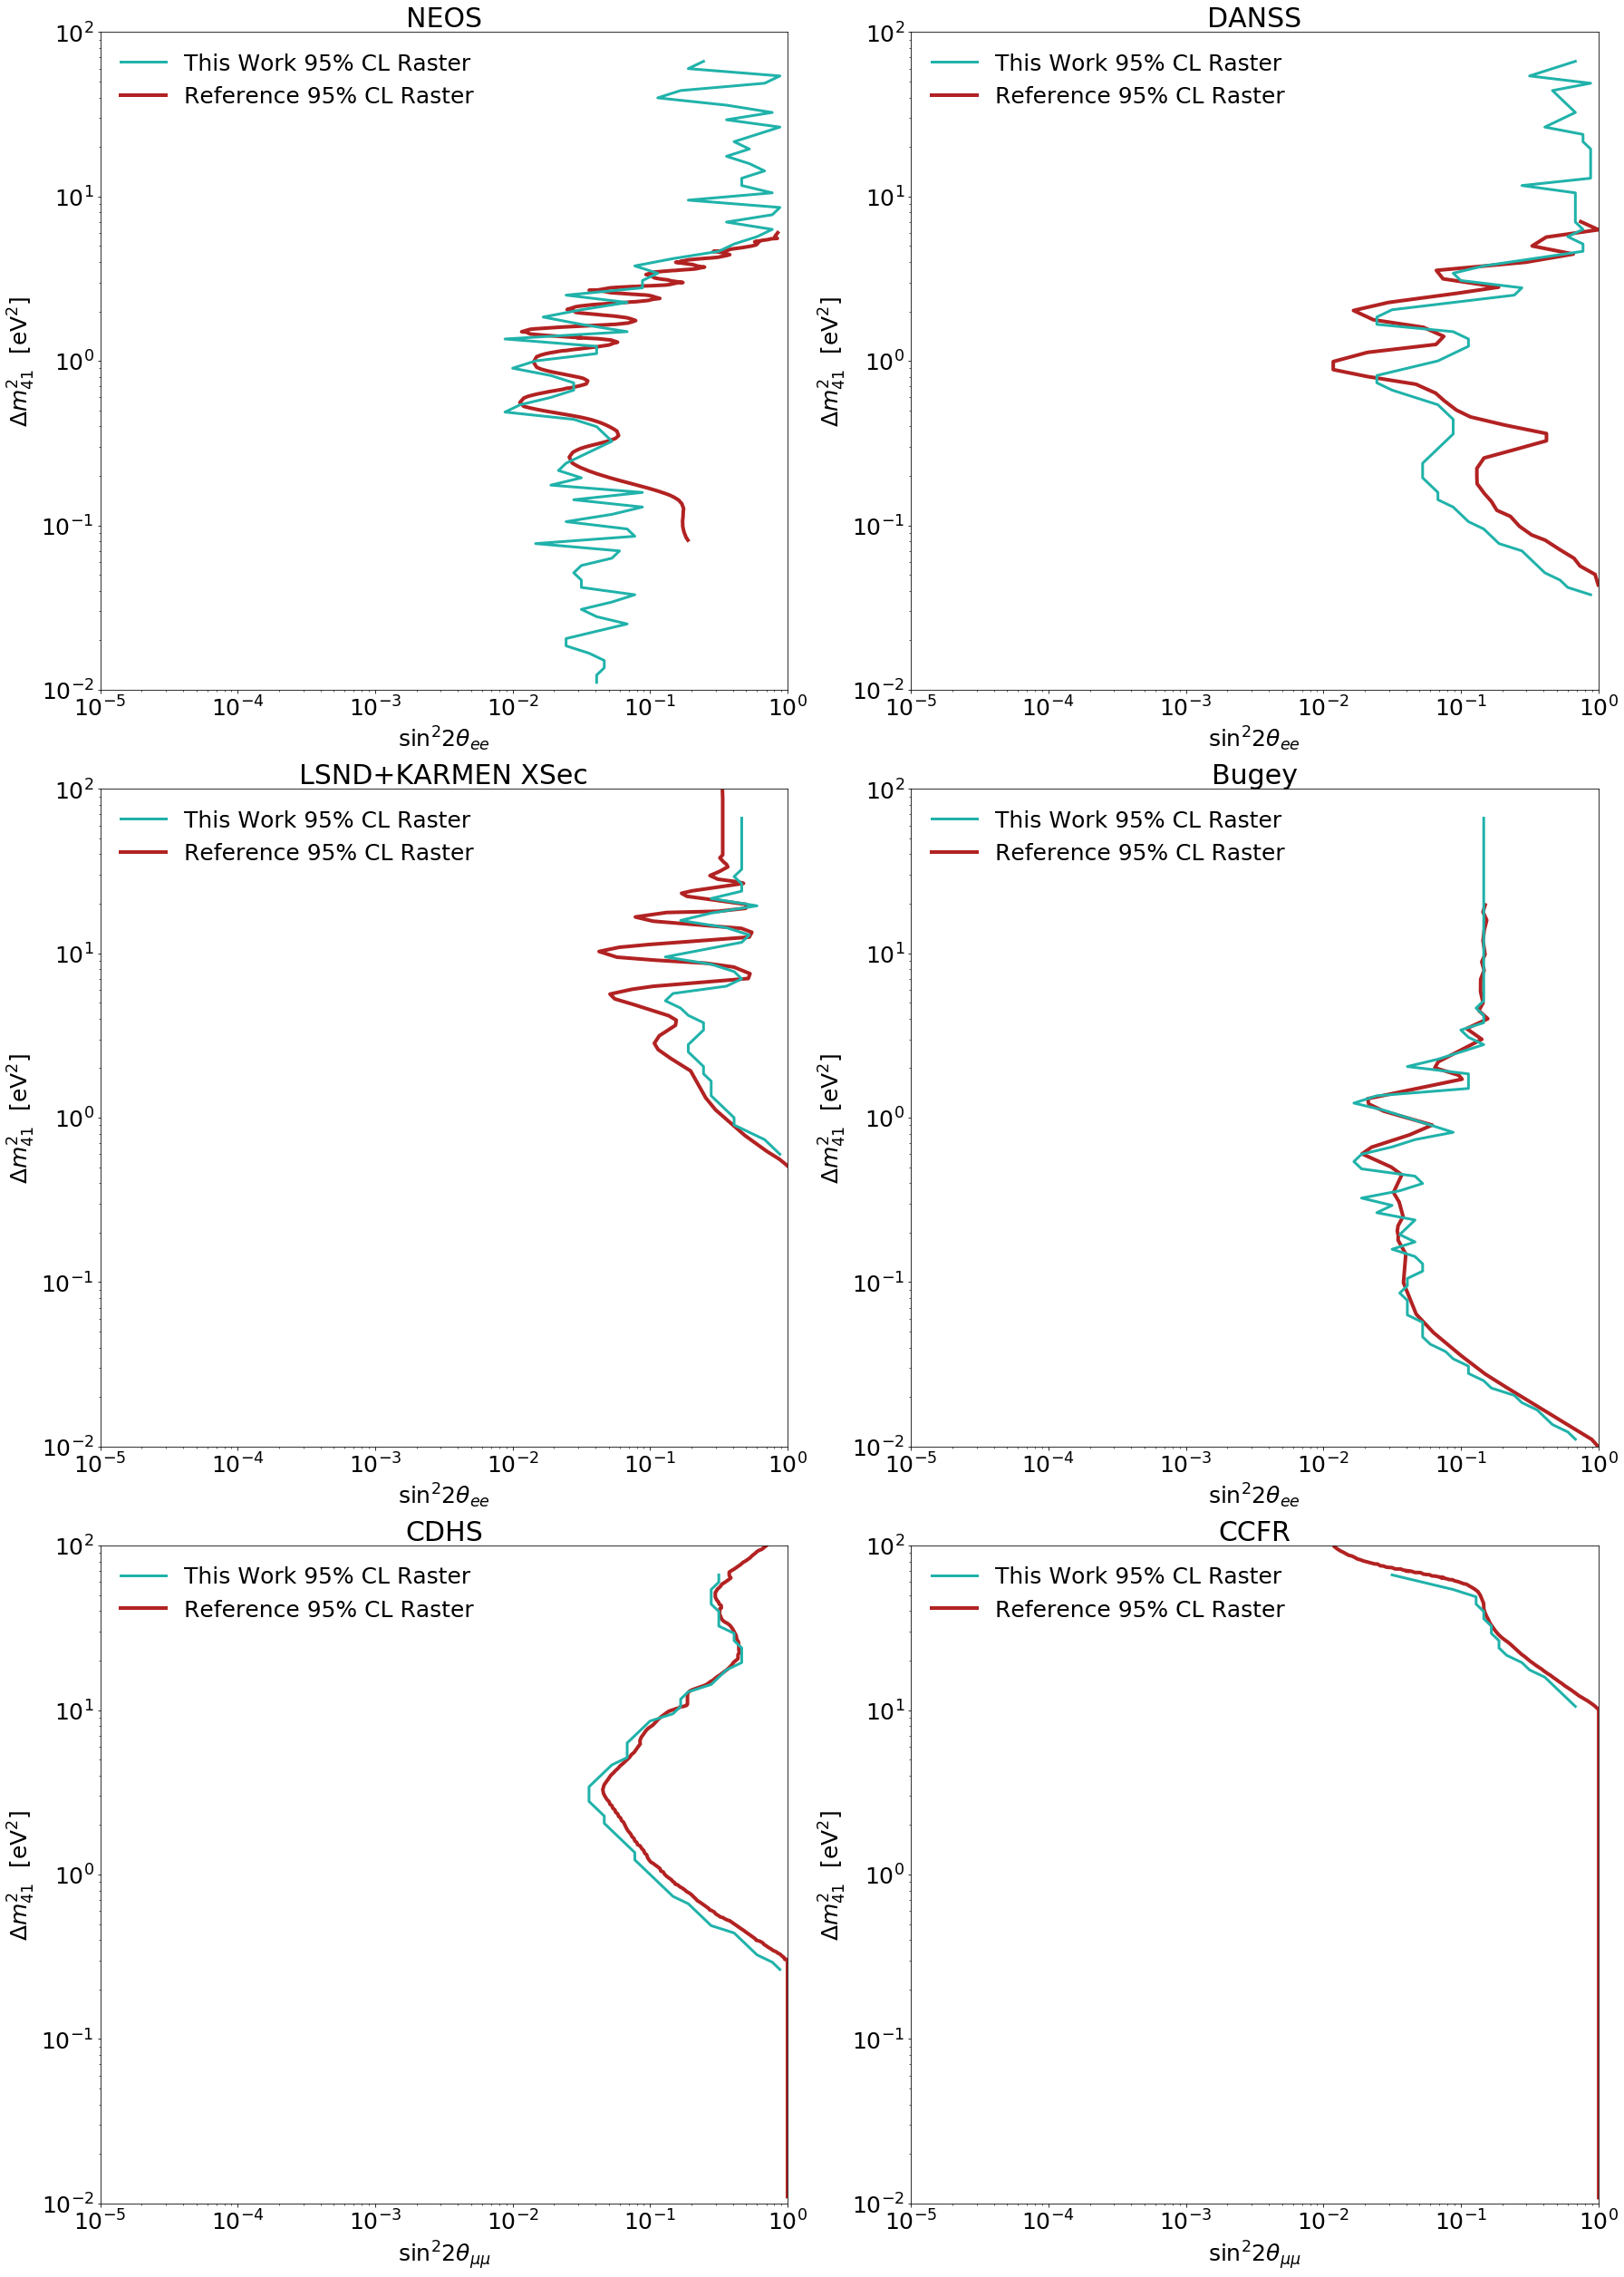

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25,35))
axes = axes.flatten()

for ax in axes:
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.axes(ax)
    plt.xlim(1e-5,1)
    plt.ylim(0.01,100)
    ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=labelsize)
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
              
#NEOS
f = ROOT.TFile("../Oct2020/validation/neos_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[0])
axes[0].set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='This Work 95% CL Raster',linewidth=3)
refx = neos[:,0]
refy = neos[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95, linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("NEOS",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

#DANSS
f = ROOT.TFile("../Oct2020/validation/danss_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[1])
axes[1].set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='This Work 95% CL Raster',linewidth=3)
refx = danss[:,0]
refy = danss[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("DANSS",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)


#xsec
f = ROOT.TFile("../Oct2020/validation/xsec_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[2])
axes[2].set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='This Work 95% CL Raster',linewidth=3)
refx = xsec[:,0]
refy = xsec[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("LSND+KARMEN XSec",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

# bugey
f = ROOT.TFile("../Oct2020/validation/bugey_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[3])
axes[3].set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='This Work 95% CL Raster',linewidth=3)
refx = bugey[:,0]
refy = bugey[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("Bugey",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

#CDHS
f = ROOT.TFile("../Oct2020/validation/cdhs_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[4])
axes[4].set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='This Work 95% CL Raster',linewidth=3)
refx = cdhs[:,0]
refy = cdhs[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("CDHS",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

#CCFR
f = ROOT.TFile("../Oct2020/validation/ccfr_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[5])
axes[5].set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='This Work 95% CL Raster',linewidth=3)
refx = ccfr[:,0]
refy = ccfr[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Reference 95% CL Raster',zorder=-1)
plt.title("CCFR",fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

fig.tight_layout()

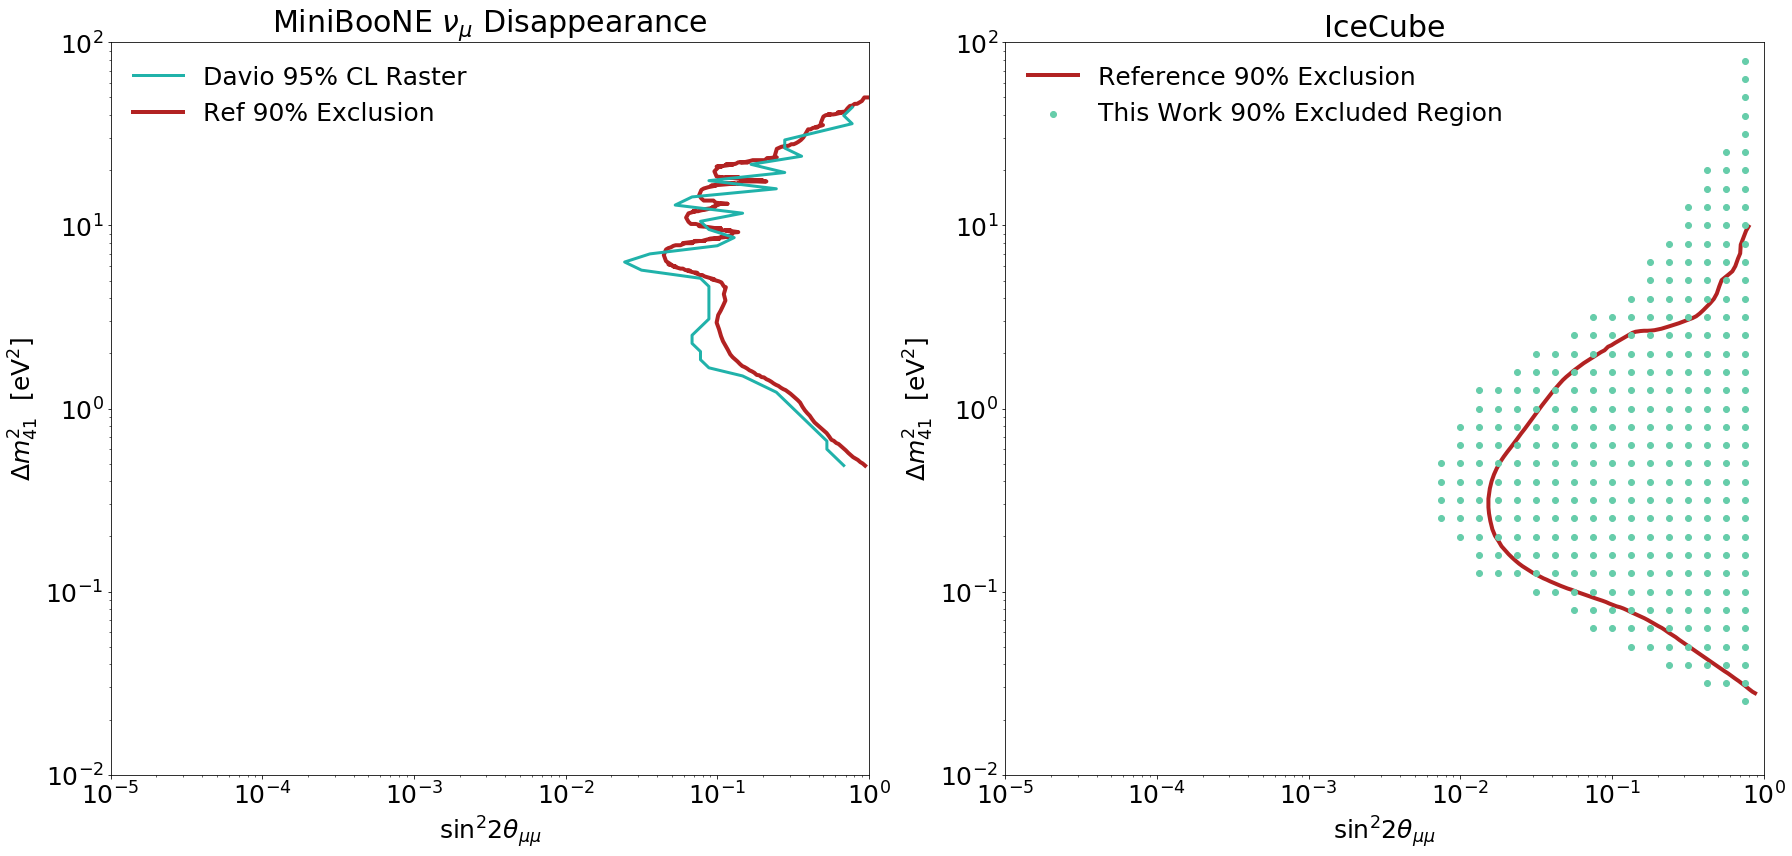

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,12))
axes = axes.flatten()

for ax in axes:
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.axes(ax)
    plt.xlim(1e-5,1)
    plt.ylim(0.01,100)
    ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=labelsize)
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)

#MBDis
f = ROOT.TFile("../Oct2020/validation/mbnudis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.axes(axes[0])
axes[0].set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=labelsize)
plt.plot(sin22th_95,dm2_95, c=c_nuedis_95,label='Davio 95% CL Raster',linewidth=3)
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color=c_ref_95,  linestyle="-",linewidth=4,label='Ref 90% Exclusion',zorder=-1)
plt.title(r'MiniBooNE $\nu_\mu$ Disappearance',fontsize=titlesize)
plt.legend(fontsize=labelsize,frameon=False)

# IC
f = ROOT.TFile("../Oct2020/IC_val_jan12_MUMUproc.root")
tchi_90 = f.Get("numudis_90_excl")
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.axes(axes[1])
axes[1].set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=labelsize)
plt.scatter(sin22th_90,dm2_90,c='mediumaquamarine',label='This Work 90% Excluded Region')
plt.plot(ic[:,0],ic[:,1],color=c_ref_95,  linestyle="-",linewidth=4,zorder=-1,label="Reference 90% Exclusion")

plt.title('IceCube',fontsize=titlesize)

plt.legend(fontsize=labelsize,frameon=False)


fig.tight_layout()

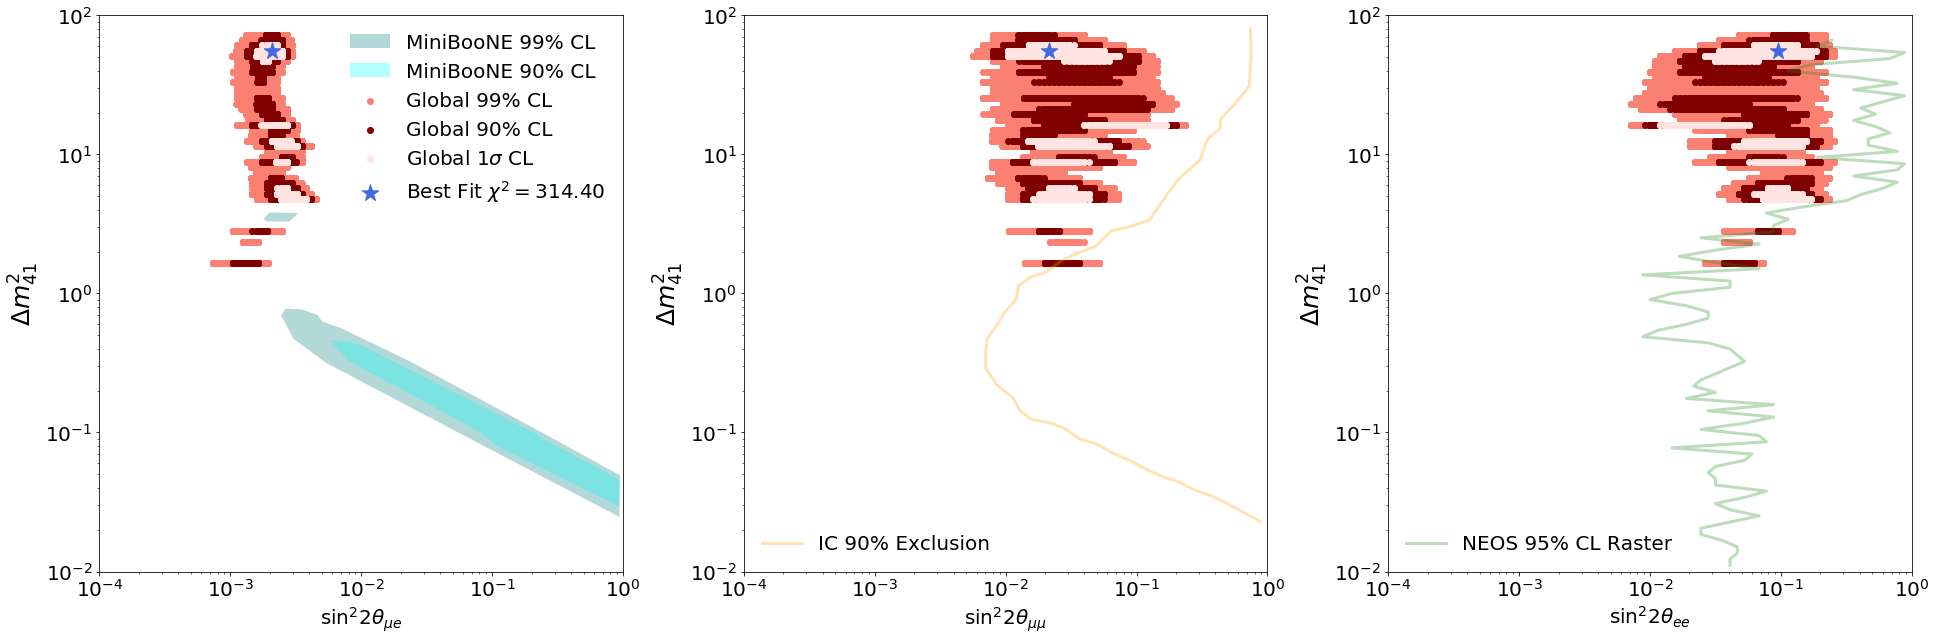

In [6]:
c_90 = 'maroon'
c_99 = 'salmon'
bkalpha = .3

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(27,9))
axes = axes.flatten()

titlesize = 30
labelsize = 20

chi2_min=314.402 
dm2_min=55.8569
sin22th_mue_min=0.00207978
sin22th_mumu_min=0.0214655
sin22th_ee_min=0.0945549



for ax in axes:
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    plt.axes(ax)
    ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    plt.xlim(1e-4,1)
    plt.ylim(0.01,100)

f = ROOT.TFile("../Oct2020/Global_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
tchi_1sig = f.Get("nueapp_1sig")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
chi2_1sig, dm2_1sig, sin22th_1sig = getArrays(tchi_1sig)
plt.axes(axes[0])
axes[0].set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='Global 99% CL')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='Global 90% CL')
plt.scatter(sin22th_1sig,dm2_1sig,c='mistyrose',label=r'Global $1\sigma$ CL')
plt.scatter([sin22th_mue_min],[dm2_min],marker="*",s=300,c='royalblue',label=r'Best Fit $\chi^2=%.2f$'%chi2_min)    

# MB
plt.fill(mb_davio_99cl1[:,0],mb_davio_99cl1[:,1], facecolor='teal',zorder=-2,label='MiniBooNE 99% CL',alpha=bkalpha)
plt.fill(mb_davio_99cl2[:,0],mb_davio_99cl2[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_99cl3[:,0],mb_davio_99cl3[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_99cl4[:,0],mb_davio_99cl4[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_90cl1[:,0],mb_davio_90cl1[:,1], facecolor='aqua',zorder=-1,label='MiniBooNE 90% CL',alpha=bkalpha)

axes[0].legend(fontsize=20,frameon=False)


tchi_99 = f.Get("numudis_99")
tchi_90 = f.Get("numudis_90")
tchi_1sig = f.Get("numudis_1sig")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
chi2_1sig, dm2_1sig, sin22th_1sig = getArrays(tchi_1sig)
plt.axes(axes[1])
axes[1].set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99)
plt.scatter(sin22th_90,dm2_90,c=c_90)
plt.scatter(sin22th_1sig,dm2_1sig,c='mistyrose')
plt.scatter([sin22th_mumu_min],[dm2_min],marker="*",s=300,c='royalblue')
plt.plot(ic_davio_90[:,0],ic_davio_90[:,1],label="IC 90% Exclusion",color='orange',linewidth=3,alpha=bkalpha)


axes[1].legend(fontsize=20,frameon=False)


tchi_99 = f.Get("nuedis_99")
tchi_90 = f.Get("nuedis_90")
tchi_1sig = f.Get("nuedis_1sig")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
chi2_1sig, dm2_1sig, sin22th_1sig = getArrays(tchi_1sig)
plt.axes(axes[2])
axes[2].set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99)
plt.scatter(sin22th_90,dm2_90,c=c_90)
plt.scatter(sin22th_1sig,dm2_1sig,c='mistyrose')
plt.scatter([sin22th_ee_min],[dm2_min],marker="*",s=300,c='royalblue')    

f = ROOT.TFile("../Oct2020/validation/neos_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='NEOS 95% CL Raster',c='forestgreen',linewidth=3,alpha=bkalpha)

axes[2].legend(fontsize=20,frameon=False)


fig.tight_layout()

# Compatibility

Text(0.5, 1.0, 'Appearance vs. Disappearance')

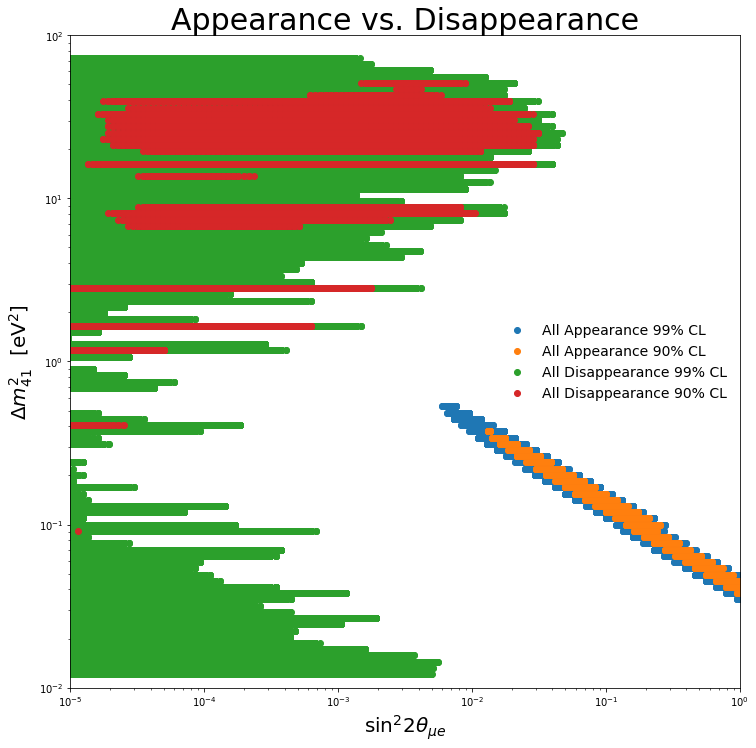

In [43]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = .2

f = ROOT.TFile("../Oct2020/allapp_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,label='All Appearance 99% CL')
plt.scatter(sin22th_90,dm2_90,label='All Appearance 90% CL')


f = ROOT.TFile("../Oct2020/alldis_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,label='All Disappearance 99% CL')
plt.scatter(sin22th_90,dm2_90,label='All Disappearance 90% CL')

ax.legend(fontsize=14,frameon=False)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'Appearance vs. Disappearance',fontsize=30)

Text(0.5, 1.0, 'Appearance vs. Disappearance')

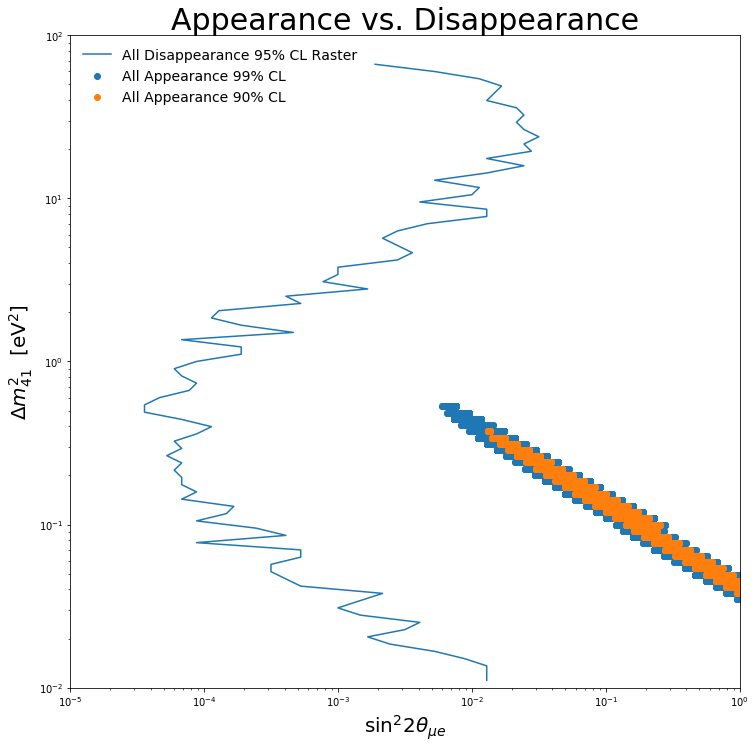

In [45]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = .2

f = ROOT.TFile("../Oct2020/allapp_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,label='All Appearance 99% CL')
plt.scatter(sin22th_90,dm2_90,label='All Appearance 90% CL')


f = ROOT.TFile("../Oct2020/alldis_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.plot(sin22th_95,dm2_95,label='All Disappearance 95% CL Raster')

ax.legend(fontsize=14,frameon=False)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'Appearance vs. Disappearance',fontsize=30)

Text(0.5, 1.0, 'MB+LSND vs. The Rest')

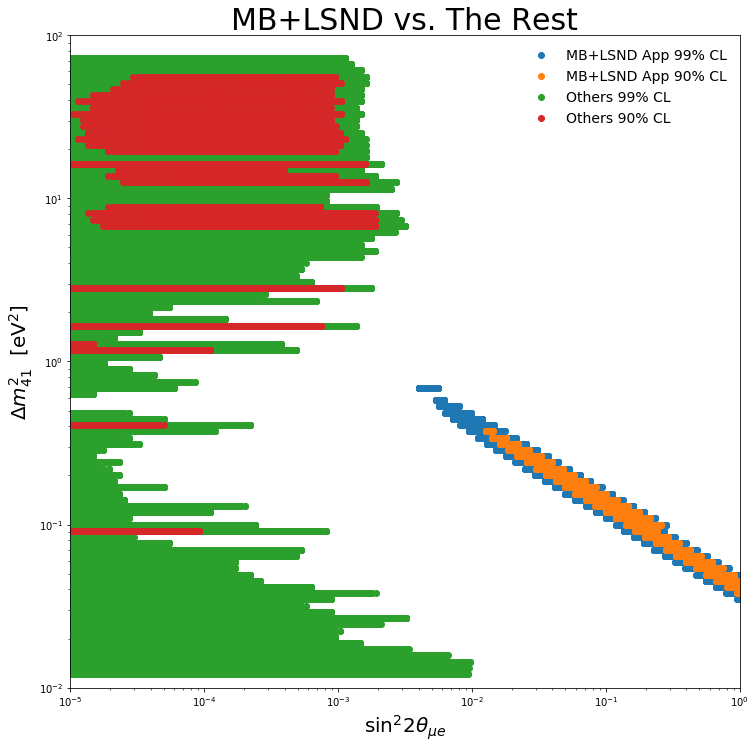

In [47]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = .2

f = ROOT.TFile("../Oct2020/mbPLUSlsnd_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,label='MB+LSND App 99% CL')
plt.scatter(sin22th_90,dm2_90,label='MB+LSND App 90% CL')


f = ROOT.TFile("../Oct2020/NOTmbORlsnd_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,label='Others 99% CL')
plt.scatter(sin22th_90,dm2_90,label='Others 90% CL')

ax.legend(fontsize=14,frameon=False)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'MB+LSND vs. The Rest',fontsize=30)

Text(0.5, 1.0, 'MB+LSND vs. The Rest')

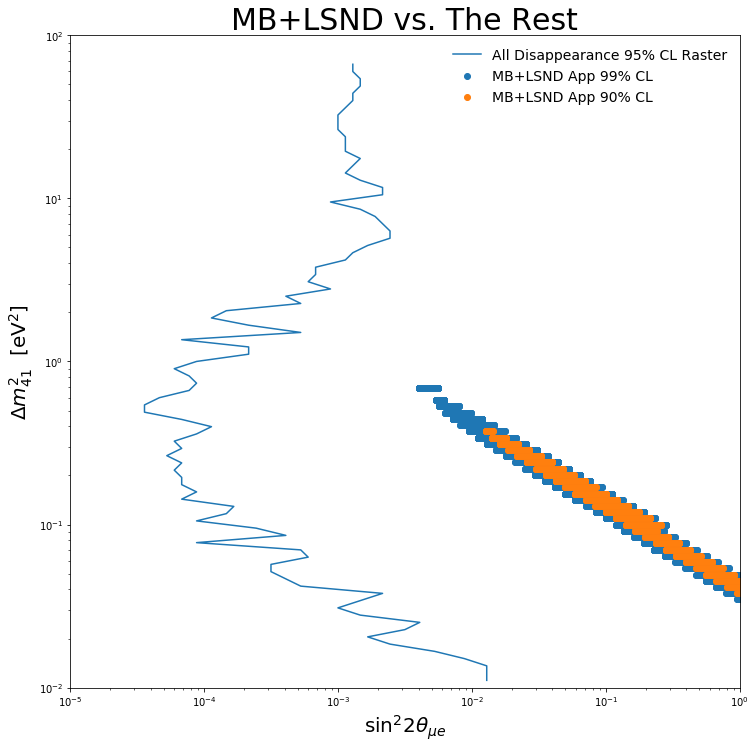

In [48]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = .2

f = ROOT.TFile("../Oct2020/mbPLUSlsnd_feb4_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_99,dm2_99,label='MB+LSND App 99% CL')
plt.scatter(sin22th_90,dm2_90,label='MB+LSND App 90% CL')


f = ROOT.TFile("../Oct2020/NOTmbORlsnd_feb4_proc_v1.root")
tchi_95 = f.Get("nueapp_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.plot(sin22th_95,dm2_95,label='All Disappearance 95% CL Raster')

ax.legend(fontsize=14,frameon=False)

plt.xlim(1e-5,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'MB+LSND vs. The Rest',fontsize=30)

Text(0.05, 0.1, 'No Osc $\\chi^2=21.91$')

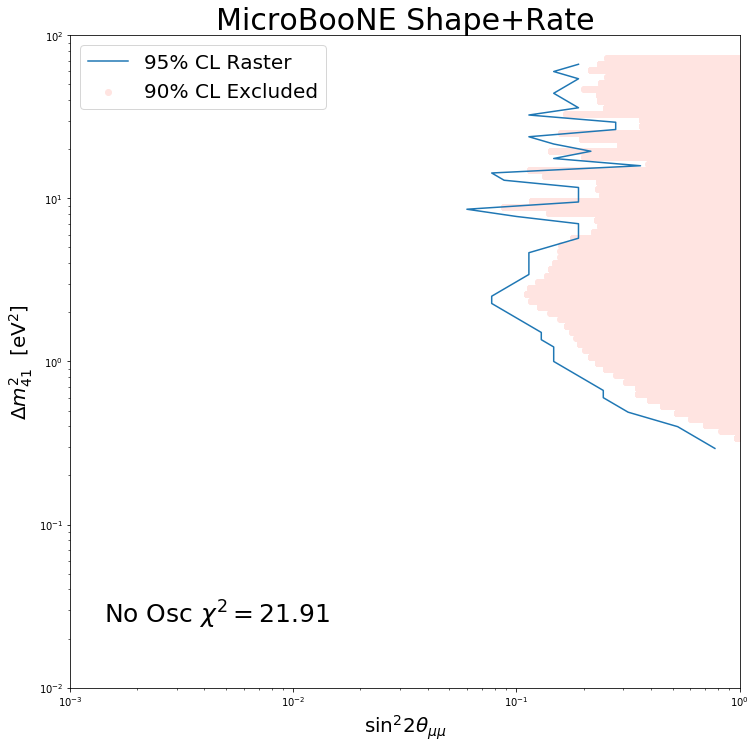

In [16]:
fig, ax = plt.subplots(figsize=(12,12))


# MicroBooNE
f = ROOT.TFile("../build/uboone_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.plot(sin22th_95,dm2_95,label='95% CL Raster')

tchi_90 = f.Get("numudis_90_exclusion")
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_90,dm2_90,label='90% CL Excluded',zorder=-1,color='mistyrose')


    
plt.title("MicroBooNE Shape+Rate",fontsize=30)
ax.legend(fontsize=20)

plt.xlim(1e-3,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


chi2_noosc=21.9068
ax.annotate(r'No Osc $\chi^2=%.2f$'%chi2_noosc,xy=(.05,.1), xycoords='axes fraction',fontsize=25)

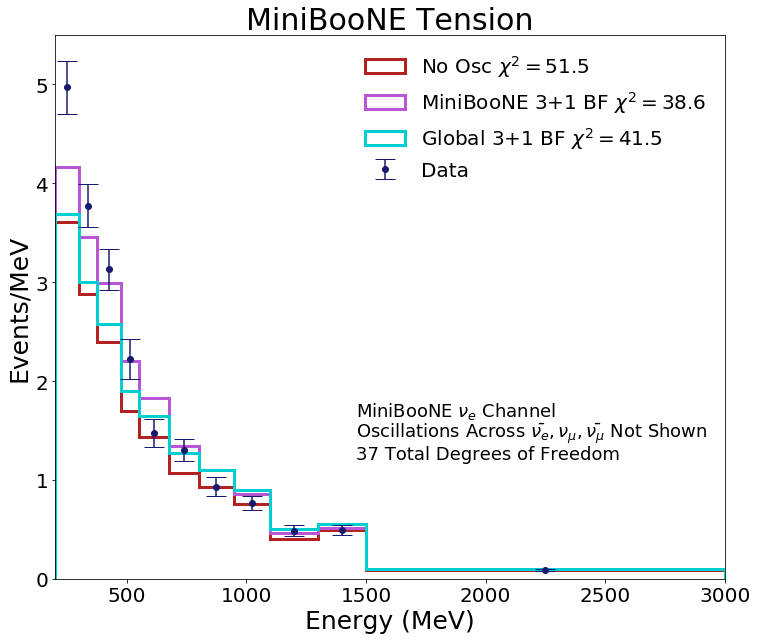

In [74]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlabel('Energy (MeV)',fontsize=25)
ax.set_ylabel('Events/MeV',fontsize=25)
ax.set_title('MiniBooNE Tension',fontsize=30)
plt.xlim(200,3000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

bins = np.array([200. , 300.,  375.,  475.,  550.,  675.,  800.,  950.,  1100.,  1300.,  1500.,  3000.])

singleevt = bins[:len(bins)-1]
data = [497,283,313,167,184,163,140,115,97,98,130] 
noosc = np.asarray((361.002, 216.002, 239.437, 127.518, 179.035, 133.902, 139.02, 113.447, 81.2045, 98.6039, 137.953))
bestfit=np.asarray((416.202, 259.249, 298.981, 164.979, 228.434, 168.499, 165.403, 128.769, 92.5131, 103.599, 141.821))
globfit=np.asarray((368.95, 225.003, 257.822, 142.473, 205.858, 159.239, 164.98, 133.968, 100.612, 110.042, 149.511))
err=np.asarray((26.5461, 16.5009, 20.5948, 15.1051, 17.8935, 14.1248, 14.8063, 10.5793, 11.1232, 10.3783, 17.2707))
    
#normalize by bin width
noosc_normed = noosc/np.diff(bins)    
data_normed = data/np.diff(bins)

bf_normed = bestfit/np.diff(bins)
globfit_normed = globfit/np.diff(bins)
err_normed = err/np.diff(bins)

width = np.diff(bins)
center = (bins[:-1] + bins[1:])/2

plt.hist(singleevt,bins=bins, weights=noosc_normed, histtype='step', stacked=True, fill=False,linewidth=3,color='firebrick',label=r'No Osc $\chi^2=51.5$')
plt.hist(singleevt,bins=bins, weights=bf_normed, histtype='step', stacked=True, fill=False,linewidth=3,color='mediumorchid',label=r'MiniBooNE 3+1 BF $\chi^2=38.6$')
plt.hist(singleevt,bins=bins, weights=globfit_normed, histtype='step', stacked=True, fill=False,linewidth=3,color='darkturquoise', label=r'Global 3+1 BF $\chi^2=41.5$')
ax.errorbar(center,data_normed,fmt='o',c='midnightblue',capsize=10,yerr=err_normed,zorder=10,label='Data')

plt.annotate(r'MiniBooNE $\nu_e$ Channel',xy=(.45, .3), xycoords='axes fraction',fontsize=18)
plt.annotate(r'Oscillations Across $\bar{\nu_e},\nu_\mu,\bar{\nu_\mu}$ Not Shown' ,xy=(.45, .26), xycoords='axes fraction',fontsize=18)
plt.annotate(r'37 Total Degrees of Freedom',xy=(.45, .22), xycoords='axes fraction',fontsize=18)
ax.legend(loc='upper right',fontsize=20,frameon=False)

# MicroBooNE Disappearance

Text(0.05, 0.1, 'No Osc $\\chi^2=20.99$')

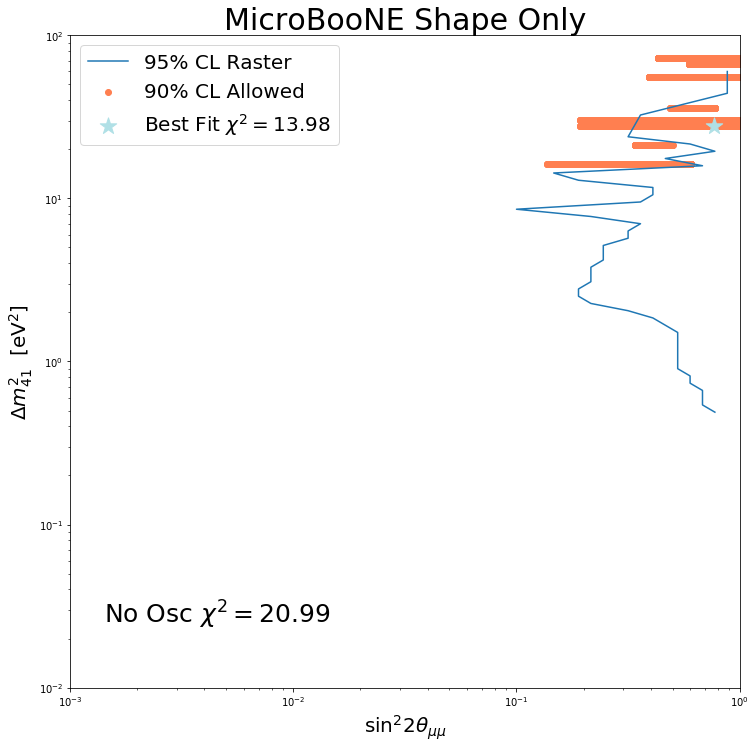

In [17]:
fig, ax = plt.subplots(figsize=(12,12))

chi2_min=13.9782 
dm2_min=27.6515
sin22th_mue_min=0.202973
sin22th_mumu_min=0.765596
sin22th_ee_min=0.253518



# MicroBooNE
f = ROOT.TFile("../build/uboone_shapeonly_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)
plt.plot(sin22th_95,dm2_95,label='95% CL Raster')

tchi_90 = f.Get("numudis_90")
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
plt.scatter(sin22th_90,dm2_90,label='90% CL Allowed',color='coral')


plt.scatter([sin22th_mumu_min],[dm2_min],marker="*",s=300,c='powderblue',label=r'Best Fit $\chi^2=%.2f$'%chi2_min)    

    
plt.title("MicroBooNE Shape Only",fontsize=30)
ax.legend(fontsize=20)

plt.xlim(1e-3,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


chi2_noosc=20.9929
ax.annotate(r'No Osc $\chi^2=%.2f$'%chi2_noosc,xy=(.05,.1), xycoords='axes fraction',fontsize=25)

NameError: name 'plt' is not defined

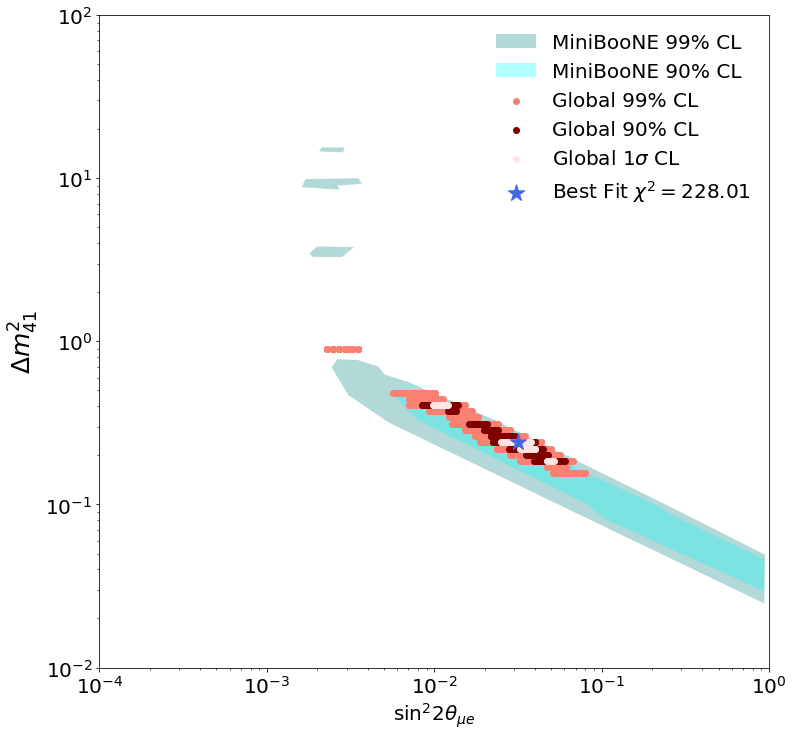

In [35]:
c_90 = 'maroon'
c_99 = 'salmon'
bkalpha = .3

fig, ax = plt.subplots(figsize=(12,12))

titlesize = 30
labelsize = 20

# Global
# chi2_min=314.402 
# dm2_min=55.8569
# sin22th_mue_min=0.00207978
# sin22th_mumu_min=0.0214655
# sin22th_ee_min=0.0945549

# no ic
# chi2_min=293.78
# dm2_min=0.40698
# sin22th_mue_min=0.0106171
# sin22th_mumu_min=0.369965
# sin22th_ee_min=0.0285152

# no ic, no neos, no danss
chi2_min=228.012
dm2_min=0.24019
sin22th_mue_min=0.0317908
sin22th_mumu_min=0.934795
sin22th_ee_min=0.0338909

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.xlim(1e-4,1)
plt.ylim(0.01,100)

f = ROOT.TFile("../build/NoICNoNEOSnoDANSS_Mar17_proc_v1.root")
tchi_99 = f.Get("nueapp_99")
tchi_90 = f.Get("nueapp_90")
tchi_1sig = f.Get("nueapp_1sig")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
chi2_1sig, dm2_1sig, sin22th_1sig = getArrays(tchi_1sig)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99,label='Global 99% CL')
plt.scatter(sin22th_90,dm2_90,c=c_90,label='Global 90% CL')
plt.scatter(sin22th_1sig,dm2_1sig,c='mistyrose',label=r'Global $1\sigma$ CL')
plt.scatter([sin22th_mue_min],[dm2_min],marker="*",s=300,c='royalblue',label=r'Best Fit $\chi^2=%.2f$'%chi2_min)    

# MB
plt.fill(mb_davio_99cl1[:,0],mb_davio_99cl1[:,1], facecolor='teal',zorder=-2,label='MiniBooNE 99% CL',alpha=bkalpha)
plt.fill(mb_davio_99cl2[:,0],mb_davio_99cl2[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_99cl3[:,0],mb_davio_99cl3[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_99cl4[:,0],mb_davio_99cl4[:,1], facecolor='teal',zorder=-2,alpha=bkalpha)
plt.fill(mb_davio_90cl1[:,0],mb_davio_90cl1[:,1], facecolor='aqua',zorder=-1,label='MiniBooNE 90% CL',alpha=bkalpha)

ax.legend(fontsize=20,frameon=False)



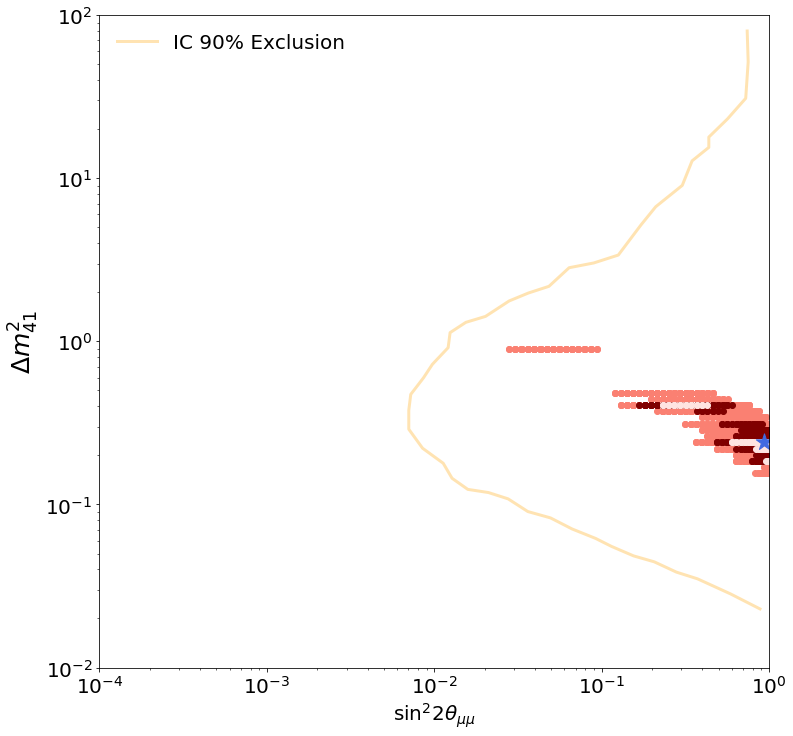

In [33]:
fig, ax = plt.subplots(figsize=(12,12))

titlesize = 30
labelsize = 20

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.xlim(1e-4,1)
plt.ylim(0.01,100)

tchi_99 = f.Get("numudis_99")
tchi_90 = f.Get("numudis_90")
tchi_1sig = f.Get("numudis_1sig")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
chi2_1sig, dm2_1sig, sin22th_1sig = getArrays(tchi_1sig)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99)
plt.scatter(sin22th_90,dm2_90,c=c_90)
plt.scatter(sin22th_1sig,dm2_1sig,c='mistyrose')
plt.scatter([sin22th_mumu_min],[dm2_min],marker="*",s=300,c='royalblue')
plt.plot(ic_davio_90[:,0],ic_davio_90[:,1],label="IC 90% Exclusion",color='orange',linewidth=3,alpha=bkalpha)


ax.legend(fontsize=20,frameon=False)


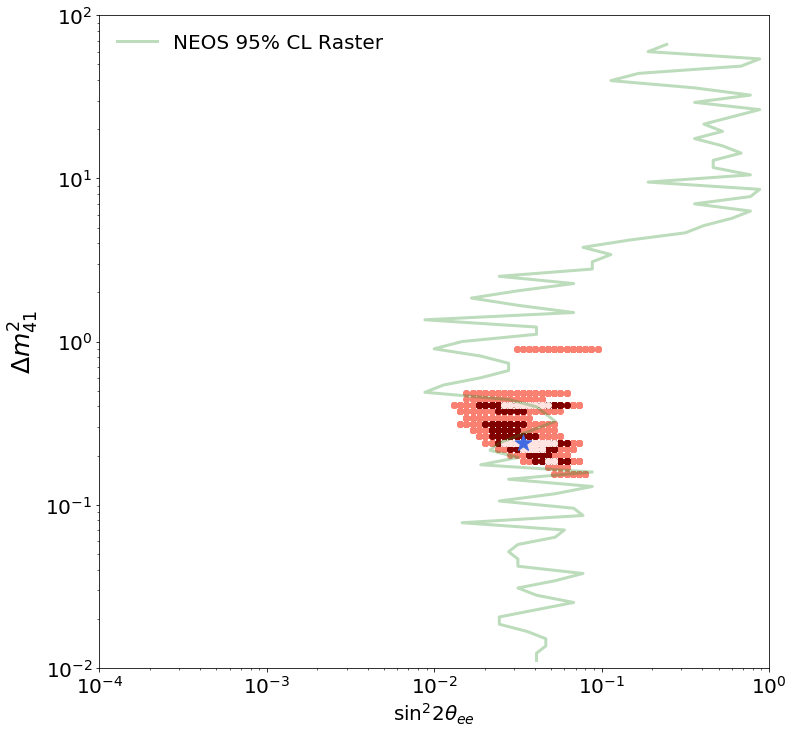

In [34]:
fig, ax = plt.subplots(figsize=(12,12))

titlesize = 30
labelsize = 20

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_ylabel(r'$\Delta m_{41}^2$',fontsize=25)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.xlim(1e-4,1)
plt.ylim(0.01,100)

tchi_99 = f.Get("nuedis_99")
tchi_90 = f.Get("nuedis_90")
tchi_1sig = f.Get("nuedis_1sig")
chi2_99, dm2_99, sin22th_99 = getArrays(tchi_99)
chi2_90, dm2_90, sin22th_90 = getArrays(tchi_90)
chi2_1sig, dm2_1sig, sin22th_1sig = getArrays(tchi_1sig)
ax.set_xlabel(r'$\sin^2 2 \theta_{e e}$',fontsize=labelsize)
plt.scatter(sin22th_99,dm2_99,c=c_99)
plt.scatter(sin22th_90,dm2_90,c=c_90)
plt.scatter(sin22th_1sig,dm2_1sig,c='mistyrose')
plt.scatter([sin22th_ee_min],[dm2_min],marker="*",s=300,c='royalblue')    

f = ROOT.TFile("../Oct2020/validation/neos_val_feb4_proc_v1.root")
tchi_95 = f.Get("nuedis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='NEOS 95% CL Raster',c='forestgreen',linewidth=3,alpha=bkalpha)

ax.legend(fontsize=20,frameon=False)